# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Visualization and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express	as px
import seaborn as sns
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Install kaggle CLI
!pip install kaggle

In [3]:
# upload API JSON
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"novrian02","key":"2c374dd593ff070d6cabd7a1865d2a38"}'}

In [4]:
# pindahkan directory json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download dataset
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip video-game-sales-with-ratings.zip

Dataset URL: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings
License(s): unknown
  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 109MB/s]
Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


In [6]:
# import dataset
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

### Deskripsi Fitur dan Nilainya

1. Name:Nama game.
  - Contoh: "Wii Sports", "Super Mario Bros.".

2. Platform: Platform atau konsol tempat game dirilis.
  - Contoh: "Wii", "NES", "PS4".

3. Year_of_Release: Tahun rilis game.
  - Contoh: 2006.0, 1985.0.

4. Genre: Genre atau kategori game.
  - Contoh: "Sports", "Platform", "Racing".

5. Publisher: Perusahaan yang menerbitkan game.
  - Contoh: "Nintendo", "Electronic Arts".

6. NA_Sales: Penjualan game di wilayah Amerika Utara (dalam juta unit).
  - Contoh: 41.36, 29.08.

7. EU_Sales: Penjualan game di wilayah Eropa (dalam juta unit).
  - Contoh: 28.96, 3.58.

8. JP_Sales: Penjualan game di wilayah Jepang (dalam juta unit).
  - Contoh: 3.77, 6.81.

9. Other_Sales:Penjualan game di wilayah lain (selain NA, EU, dan JP) dalam juta unit.
  - Contoh: 8.45, 0.77.

10. Global_Sales: Total penjualan game di seluruh dunia (dalam juta unit).
  - Contoh: 82.53, 40.24.

11. Critic_Score: Skor agregat dari kritik yang dikumpulkan oleh Metacritic (skala 0-100).
  - Contoh: 76.0, 82.0.

12. Critic_Count: Jumlah kritik yang digunakan untuk menghitung Critic_Score.
  - Contoh: 51, 73.

13. User_Score: Skor agregat dari pengguna yang dikumpulkan oleh Metacritic (skala 0-10).
  - Contoh: 8.0, 8.3.

14. User_Count: Jumlah pengguna yang memberikan User_Score.
  - Contoh: 322, 709.

15. Developer: Perusahaan atau tim yang mengembangkan game.
  - Contoh: "Nintendo", "Ubisoft".

16. Rating: Rating ESRB (Entertainment Software Rating Board) yang menunjukkan kategori usia game.
  - Contoh: "E" (Everyone), "T" (Teen), "M" (Mature).

Ringkasan

- Fitur Numerikal: Year_of_Release, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count.
- Fitur Kategorikal: Name, Platform, Genre, Publisher, Developer, Rating.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
# Cek informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


- Terdapat 16 kolom fitur dataset dengan 2 tipe data yaitu object dan float64
- terdapat missing value pada sebagian fitur

In [8]:
# Deskripsi fitur numeric
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [9]:
print('Jumlah baris', df.shape[0])
print('Jumlah kolom', df.shape[1])

Jumlah baris 16719
Jumlah kolom 16


In [10]:
# Cek missig value
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Terdapat banyak missing value dan akan ditangani saat proses preprocessing

In [11]:
# cek duplicated value pada dataset
df.duplicated().sum()

0

### Distribusi Data Numerical

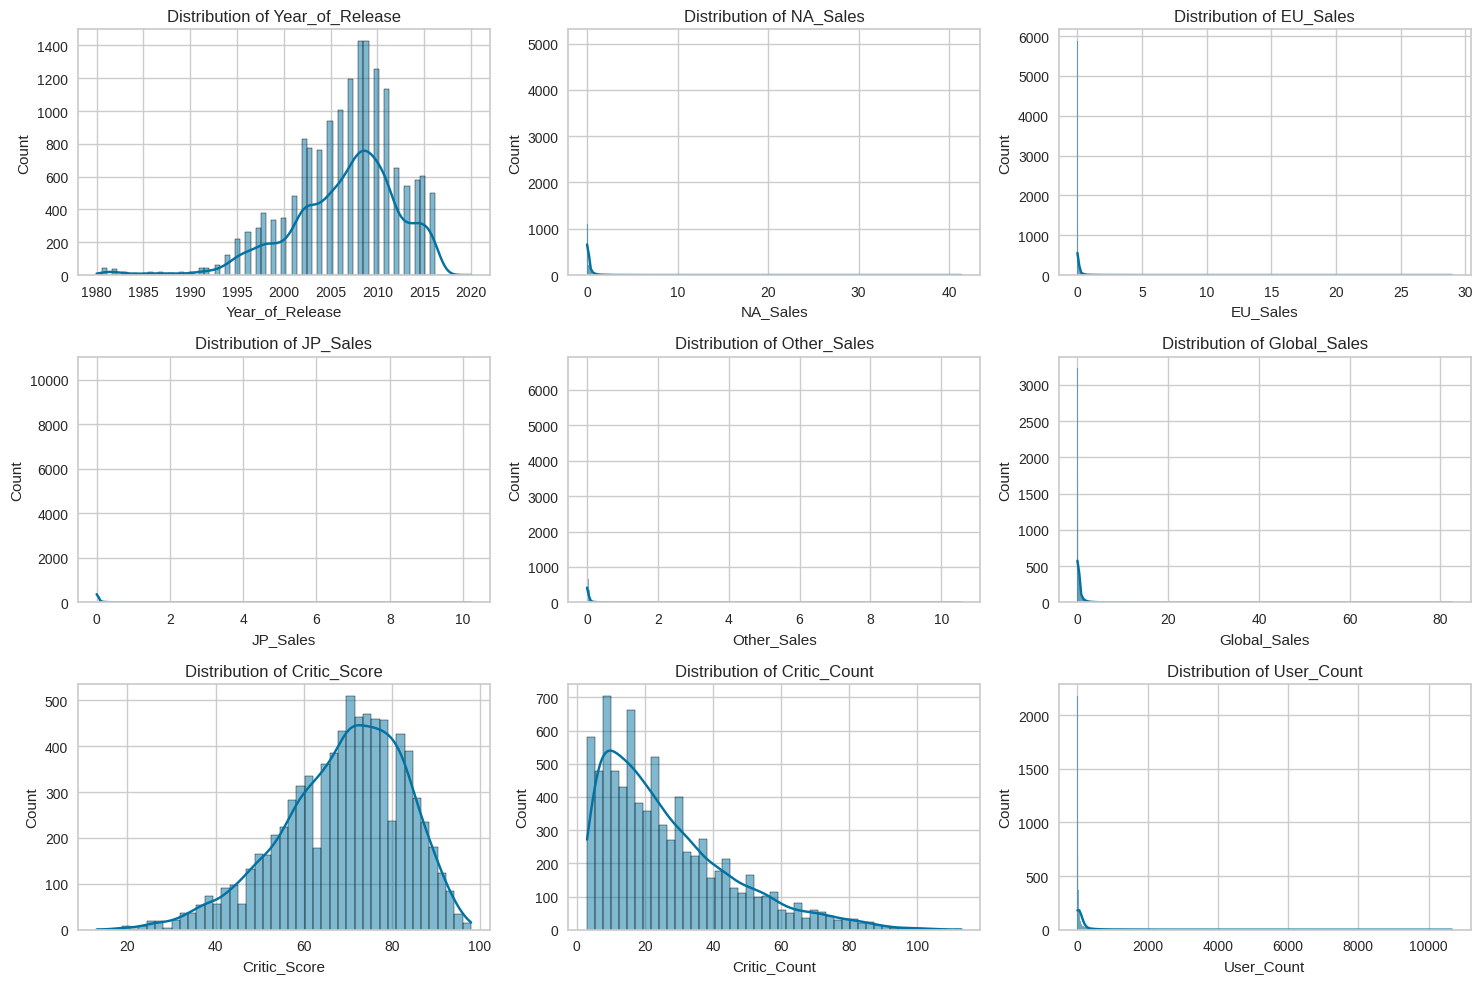

In [12]:
# Visualisasi distribusi data numerical

# Pisahkan data numerical
num_cols = df.select_dtypes(include=['number']).columns

# membuat plot visualisasi data
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.histplot(data=df, x=col, kde=True, ax=axes[i], palette='coolwarm')
  axes[i].set_title(f'Distribution of {col}')

for i in range(len(num_cols), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- Sebagian fitur memiliki distribusi data disekitar 0-1 untuk fitur jp_sales, other sales, global sales, na sales, eu sales dan user count
- Distribusi data year of release memiliki jumlah distribusi terbanyak pada rentang tahun 2005 - 2015, dan puncaknnya pada tahu 2010
- Distribusi data critic score lebih condong ke sebelah kanan, sementara distribusi data critic count lebih condong ke kiri.

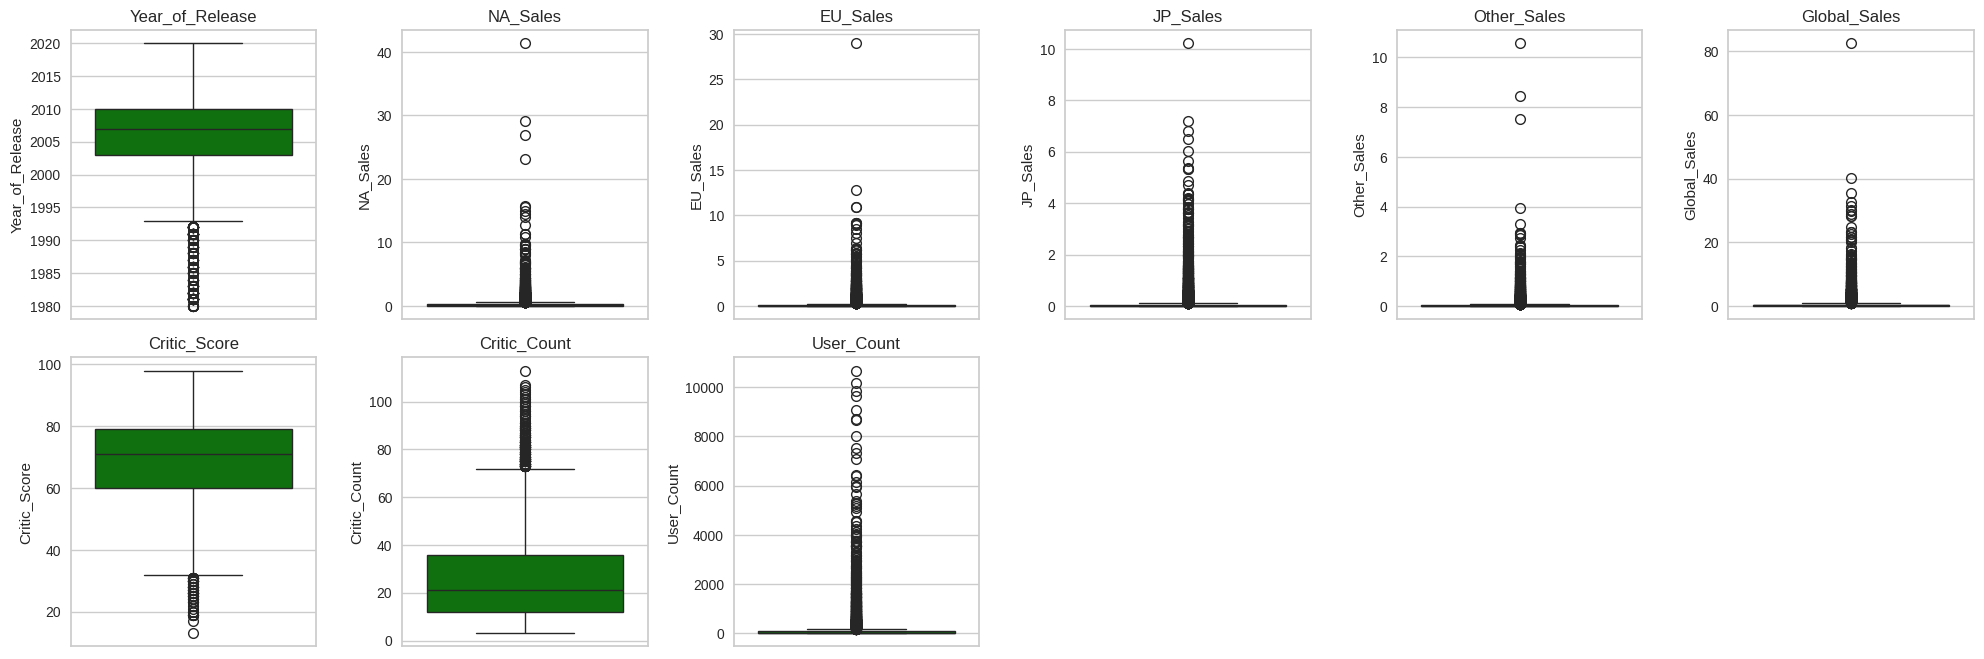

In [13]:
# Visualisasi distribusi variabel numerik menggunakan boxplot
plt.figure(figsize=(20, 10))

for i, column in enumerate(num_cols):
    plt.subplot(3,6 , i + 1)
    sns.boxplot(y=column, data=df, color='green')
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

Terdapat banyak outlier untuk setiap fitur dan perlu dilakukan penangan untuk mengatasi outlier

### Distribusi Data Kategorical

In [14]:
# Menyimpan fitur kategorical dalam variabel cat_cols
cat_cols = df.select_dtypes(include=['object'])
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        16717 non-null  object
 1   Platform    16719 non-null  object
 2   Genre       16717 non-null  object
 3   Publisher   16665 non-null  object
 4   User_Score  10015 non-null  object
 5   Developer   10096 non-null  object
 6   Rating      9950 non-null   object
dtypes: object(7)
memory usage: 914.4+ KB


In [15]:
# Beberapa fitur memiliki jumlah kategori yang banyak oleh karena itu perlu dilakuakn analissi untuk top 10 distribusi data terbanyak
# Function menghitung distribusi fitur categorical
def counts_cat_cols(data, col):
  count_col = data[col].value_counts()
  top_n = 10
  top_value = count_col[:top_n]
  other_value = count_col[top_n:].sum()
  top_value = pd.concat([top_value, pd.Series({'Other': other_value})])
  return top_value


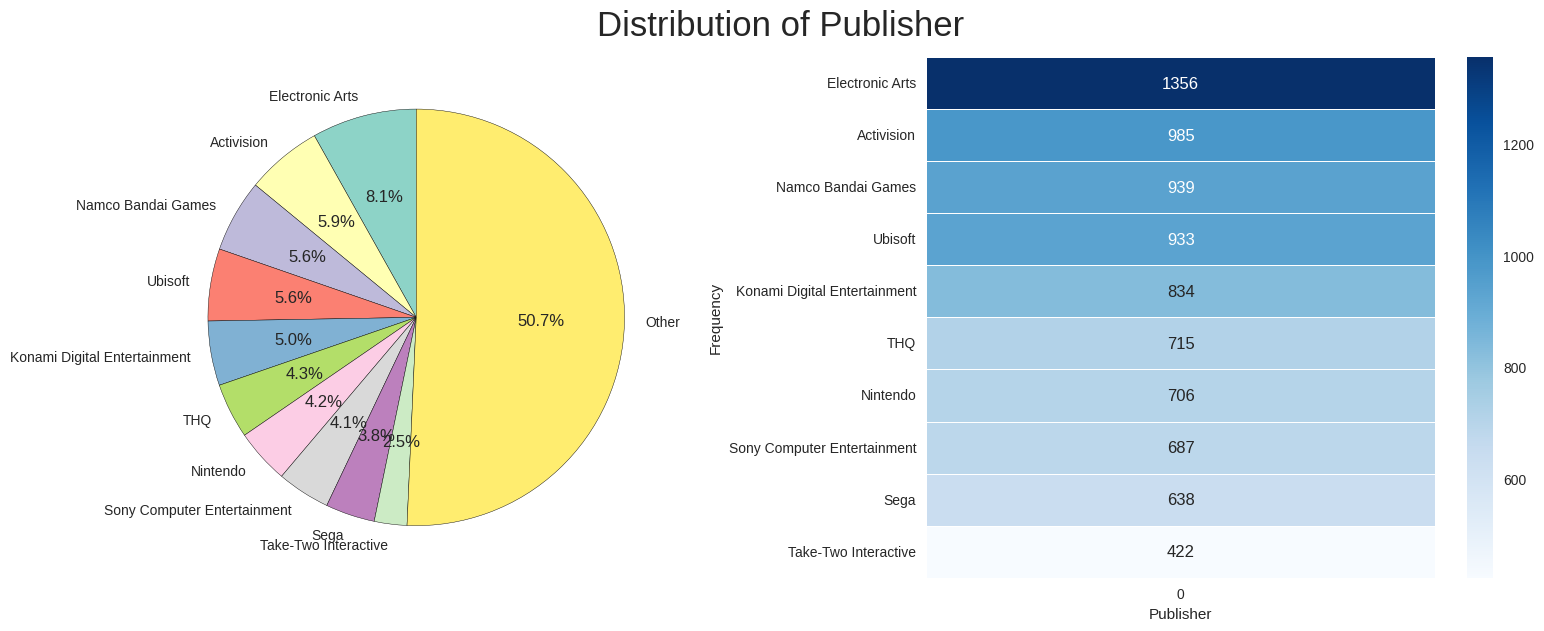

In [16]:
# Hitung distribusi kategori Publisher
count_publisher = counts_cat_cols(cat_cols, 'Publisher')

# Buat figure dan dua subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Pie Chart ---
count_publisher.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3',
    wedgeprops={'edgecolor': 'black'},
    ax=axes[0]  # Menetapkan subplot pertama
)
axes[0].set_ylabel("")  # Menghapus label sumbu Y

# --- 2. Heatmap ---
sns.heatmap(
    count_publisher[:-1].to_frame(),  # Menghapus "Other" agar lebih proporsional
    annot=True,
    cmap="Blues",
    fmt="d",
    linewidths=0.5,
    ax=axes[1]  # Menetapkan subplot kedua
)
axes[1].set_xlabel("Publisher")
axes[1].set_ylabel("Frequency")

# Tampilkan figure
plt.tight_layout()  # Agar tidak tumpang tindih
plt.suptitle('Distribution of Publisher', fontsize=25, y=1.05)
plt.show()

- publisher top 10 kecuali other, yang memiliki jumlah distribusi data terbanyak terdapat pada kategori electronic arts 8.1%(1356) dan activision 5.9%(985)
- Publisher other merupakan jumlah kesuluruhan distribusi data untuk kategori yang tidak top 10.


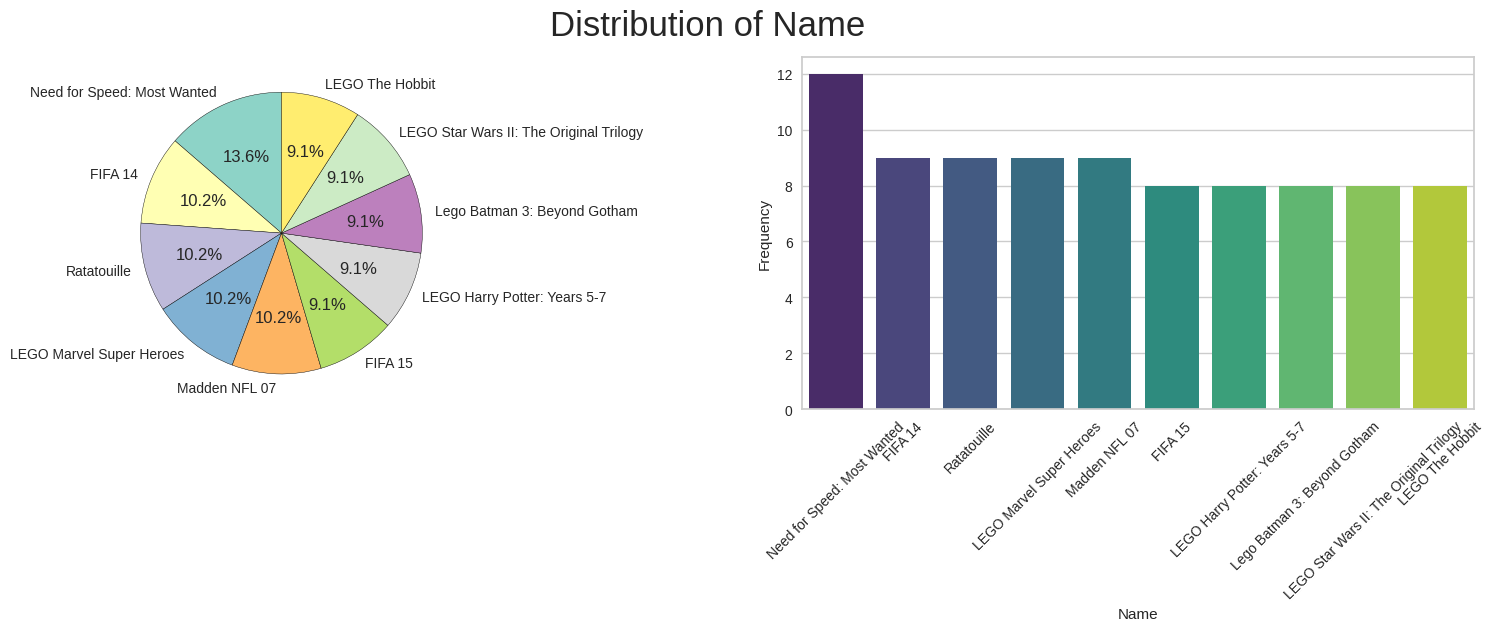

In [17]:
# Distribusi data name
count_name = counts_cat_cols(cat_cols, 'Name')

# Buat figure dan dua subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Pie Chart ---
count_name[:-1].plot( # Drop kategori 'Other'
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3',
    wedgeprops={'edgecolor': 'black'},
    ax=axes[0]  # Menetapkan subplot pertama
)
axes[0].set_ylabel("")  # Menghapus label sumbu Y

# --- 2. Barplot ---
sns.barplot(
    count_name[:-1].to_frame(),  # Menghapus "Other" agar lebih proporsional
    x=count_name[:-1].index,
    y=count_name[:-1].values,
    palette='viridis',
    ax=axes[1]  # Menetapkan subplot kedua
)
axes[1].set_xlabel("Name")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel("Frequency")

# Tampilkan figure
plt.tight_layout()  # Agar tidak tumpang tindi
plt.suptitle('Distribution of Name', fontsize=25, y=1.05)
plt.show()

- Top 10 distribusi data kategorical name yaitu need for speed: Most Wanted memiliki jumlah pembelian terbanyak sebanyak 13.6&

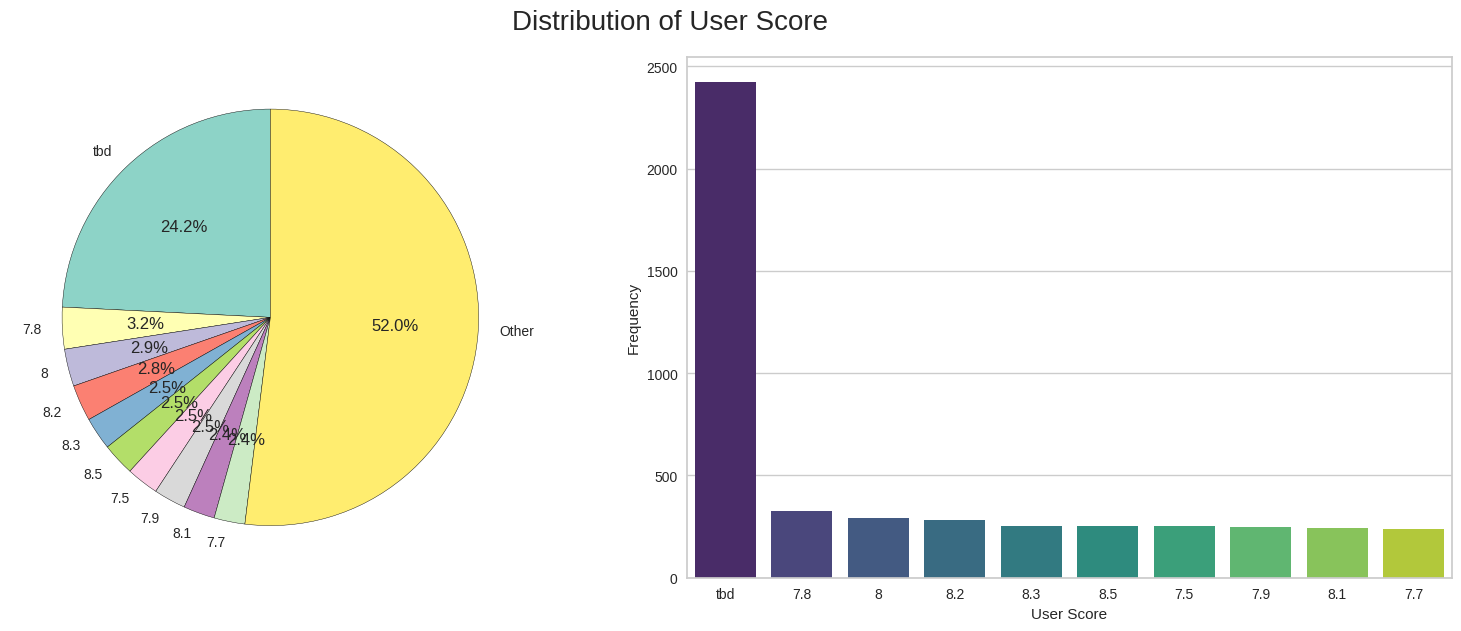

In [18]:
# Distribusi data User Score
count_user = counts_cat_cols(cat_cols, 'User_Score')

# Buat figure dan dua subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Pie Chart ---
count_user.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3',
    wedgeprops={'edgecolor': 'black'},
    ax=axes[0]  # Menetapkan subplot pertama
)
axes[0].set_ylabel("")  # Menghapus label sumbu Y

# --- 2. Barplot ---
sns.barplot(
    count_user[:-1].to_frame(),  # Menghapus "Other" agar lebih proporsional
    x=count_user[:-1].index,
    y=count_user[:-1].values,
    palette='viridis',
    ax=axes[1]  # Menetapkan subplot kedua
)
axes[1].set_xlabel("User Score")
axes[1].set_ylabel("Frequency")

# Tampilkan figure
plt.tight_layout()  # Agar tidak tumpang tindi
plt.suptitle('Distribution of User Score', fontsize=20, y=1.05)
plt.show()

- distibursi other merupakan kumpulan dari kategori selain top 10 distribusi data terbanyak
- tbd merupakan kategori dengan penamanaan yang salah seharusnya bertipe float dan ini perlu ditangani
- Distribusi data kedua tertinggi dengan score 7.8 sebanyak 3.2%

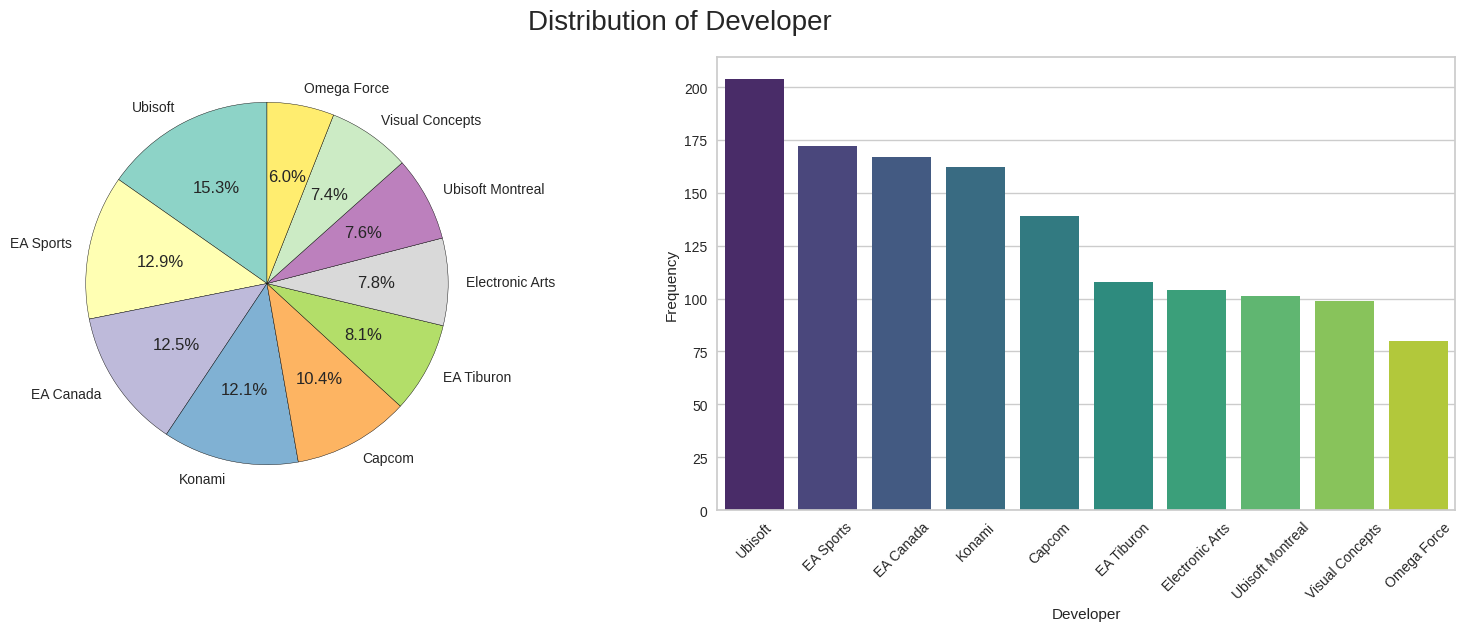

In [19]:
# Distribusi data Developer
count_dev = counts_cat_cols(cat_cols, 'Developer')

# Buat figure dan dua subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Pie Chart ---
count_dev[:-1].plot( # Drop kategori other
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3',
    wedgeprops={'edgecolor': 'black'},
    ax=axes[0]  # Menetapkan subplot pertama
)
axes[0].set_ylabel("")  # Menghapus label sumbu Y

# --- 2. Heatmap ---
sns.barplot(
    count_dev[:-1].to_frame(),  # Menghapus "Other" agar lebih proporsional
    x=count_dev[:-1].index,
    y=count_dev[:-1].values,
    palette='viridis',
    ax=axes[1]  # Menetapkan subplot kedua
)
axes[1].set_xlabel("Developer")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_ylabel("Frequency")

# Tampilkan figure
plt.tight_layout()  # Agar tidak tumpang tindi
plt.suptitle('Distribution of Developer', fontsize=20, y=1.05)
plt.show()

- top 10 distribusi data developer di pimpin oleh kategori developer Ubisoft dengan jumlah distribusi data 15.3% (200+) dan EA Sports 12.9%(170+)


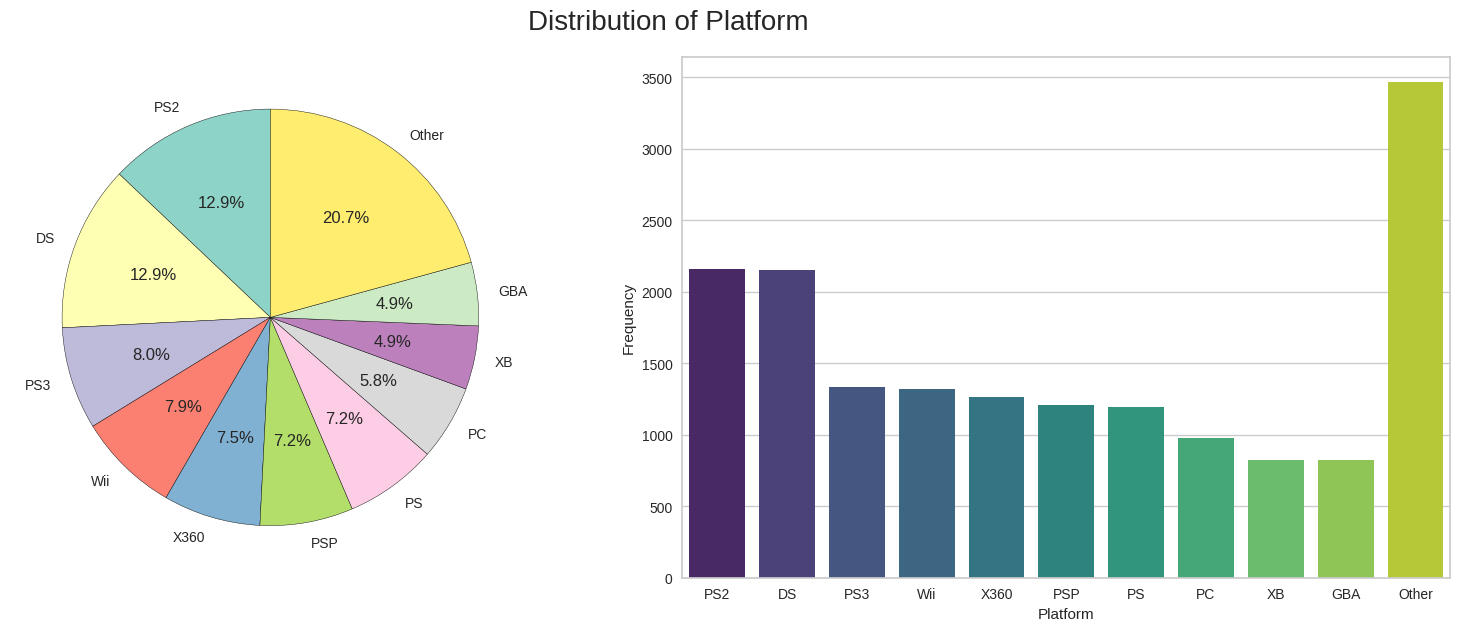

In [20]:
# Distribusi data Platform
count_platform = counts_cat_cols(cat_cols, 'Platform')

# Buat figure dan dua subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1. Pie Chart ---
count_platform.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='Set3',
    wedgeprops={'edgecolor': 'black'},
    ax=axes[0]  # Menetapkan subplot pertama
)
axes[0].set_ylabel("")  # Menghapus label sumbu Y

# --- 2. Heatmap ---
sns.barplot(
    count_platform.to_frame(),  # Menghapus "Other" agar lebih proporsional
    x=count_platform.index,
    y=count_platform.values,
    palette='viridis',
    ax=axes[1]  # Menetapkan subplot kedua
)
axes[1].set_xlabel("Platform")
axes[1].set_ylabel("Frequency")

# Tampilkan figure
plt.tight_layout()  # Agar tidak tumpang tindi
plt.suptitle('Distribution of Platform', fontsize=20, y=1.05)
plt.show()

- top 10 distribusi data terbanyak yaitu terdapat pada kategori ps2 12.9%(200+) dan DS 12.9%(200+).
Kat

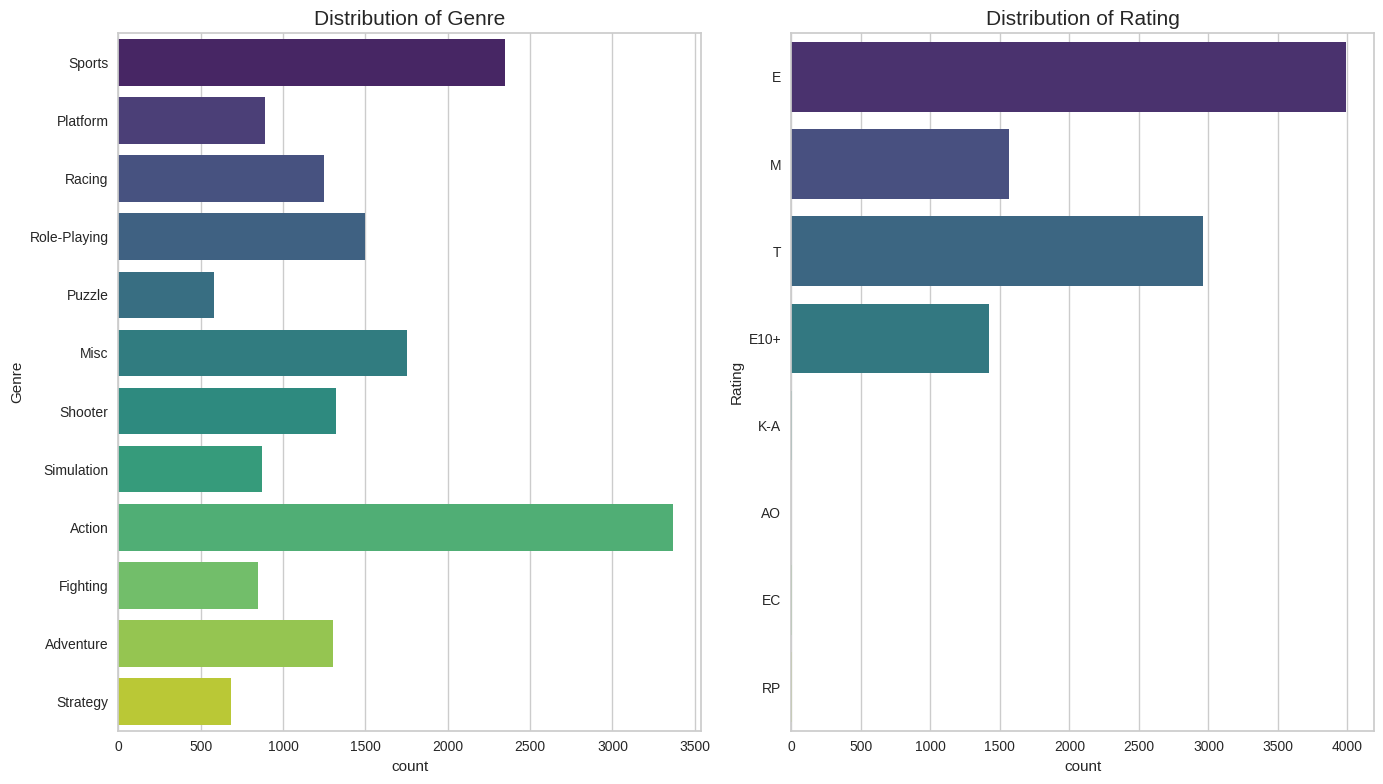

In [21]:
# Distribusi
column_col = ['Genre', 'Rating']

plt.figure(figsize=(14,8))
for i, column in enumerate(cat_cols[column_col], 1):
  plt.subplot(1, 2, i)
  sns.countplot(y=df[column], palette='viridis')
  plt.title(f'Distribution of {column}', fontsize=15)
plt.tight_layout()
plt.show()

- Pada fitur genre untuk distribusi data terbanyak terdapat pada kategori action (3000+) dan Sports(2000+)
- Pada fitur rating untuk distribusi data dari 8 kategori hanya terdapat 4 kategori yang memiliki distribusi data terbanyak yaitu E, M, T, E10+, distribusi data untuk kategori KA, AO, EC, dan RP memiliki jumlah sangat rendah dibawah 50 data

### Korelasi antar fitur numerical

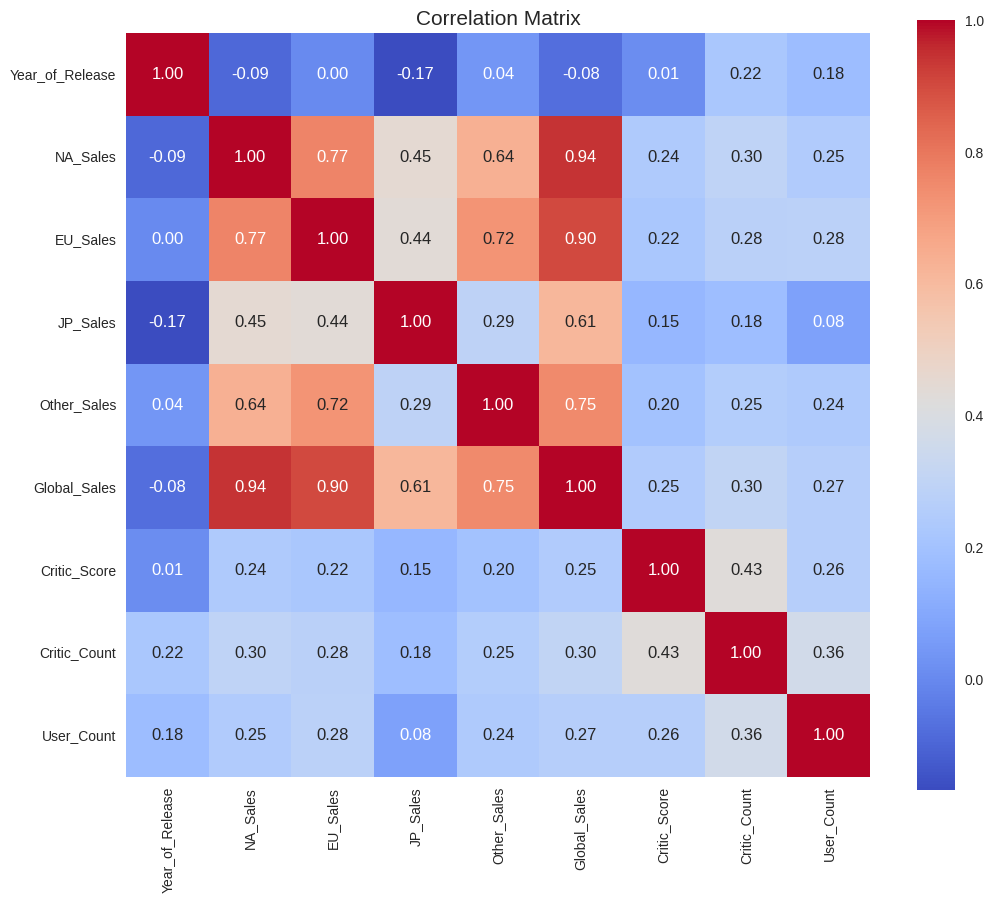

In [22]:
# Correlation fitur numeric
plt.figure(figsize=(12, 10))
corr_col = df[num_cols].corr()
sns.heatmap(corr_col, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

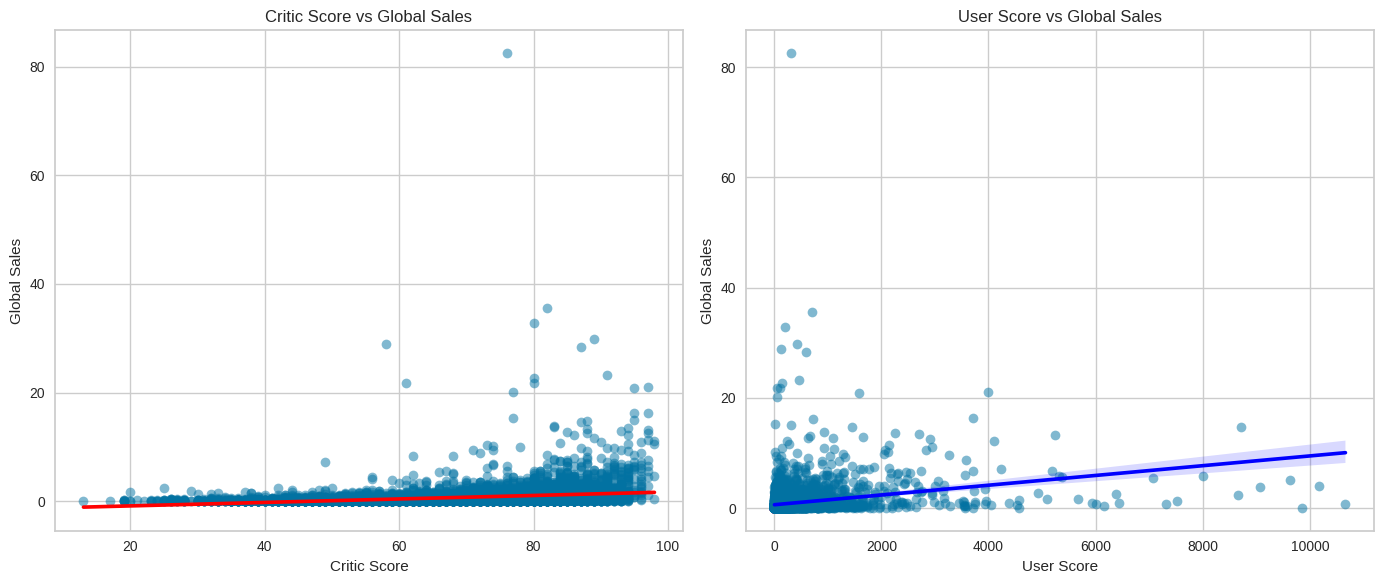

In [23]:
# Buat figure dengan 2 subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot Global_Sales vs Critic_Score
sns.regplot(
    data=df, x='Critic_Score', y='Global_Sales',
    scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[0]
)
axes[0].set_title("Critic Score vs Global Sales")
axes[0].set_xlabel("Critic Score")
axes[0].set_ylabel("Global Sales")

# Scatter plot Global_Sales vs User_Count
sns.regplot(
    data=df, x='User_Count', y='Global_Sales',
    scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue'}, ax=axes[1]
)
axes[1].set_title("User Score vs Global Sales")
axes[1].set_xlabel("User Score")
axes[1].set_ylabel("Global Sales")

plt.tight_layout()
plt.show()

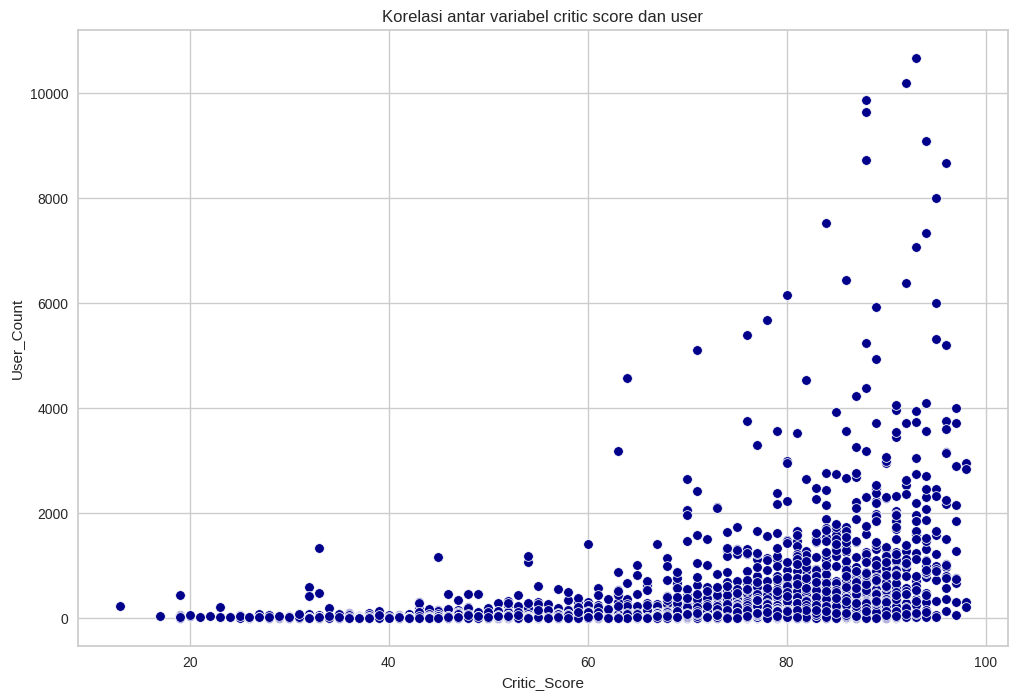

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Critic_Score', y='User_Count', color='darkblue')
plt.title('Korelasi antar variabel critic score dan user')
plt.show()

In [25]:
fig	=	px.scatter(df,	x='Critic_Score',	y='User_Count',	color='Rating',	size_max	=	50)
fig.update_layout(width=1000,	height=500)
fig.update_layout(title_text='Scatter	Plot	of	Critic Score	vs.	User Count	(colored	by	cp)')

In [26]:
 fig	=	px.scatter(data_frame	=	df,
																	x="Critic_Score",
																	y="User_Count",
																	color="Rating",
																	)
 fig.update_layout(title_text="<b>	Critic Score	Vs	User	<b>",
																		titlefont={'size':	24,	'family':'Serif'},
																		width=1000,
																		height=500,
																	)
 fig.show()

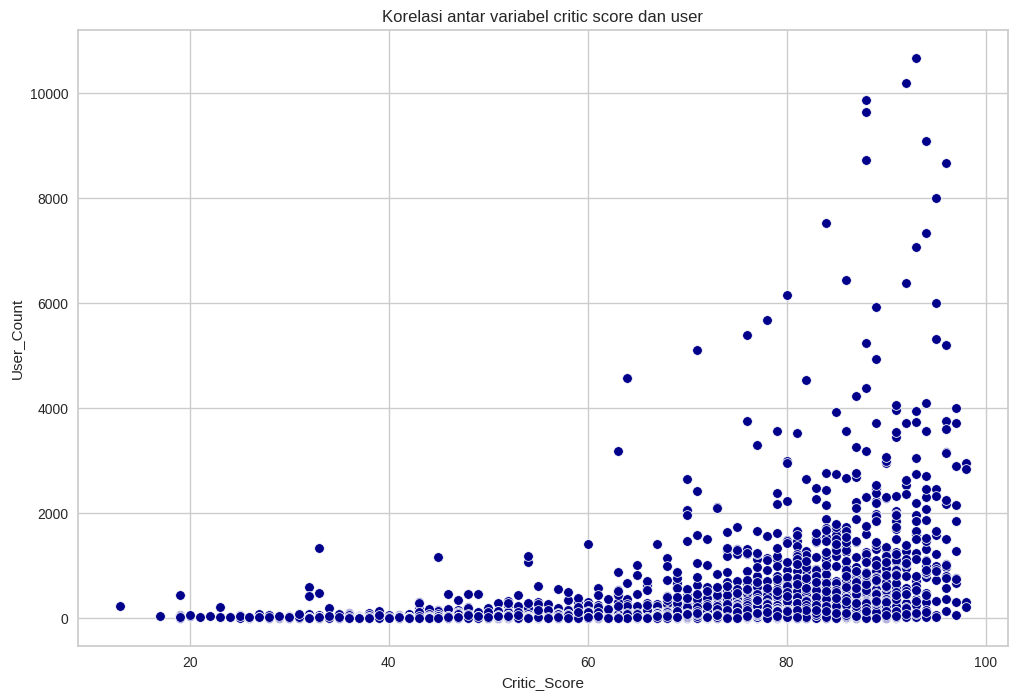

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Critic_Score', y='User_Count', color='darkblue')
plt.title('Korelasi antar variabel critic score dan user')
plt.show()


Scatter Plot untuk Hubungan Antar Variabel Numerik:


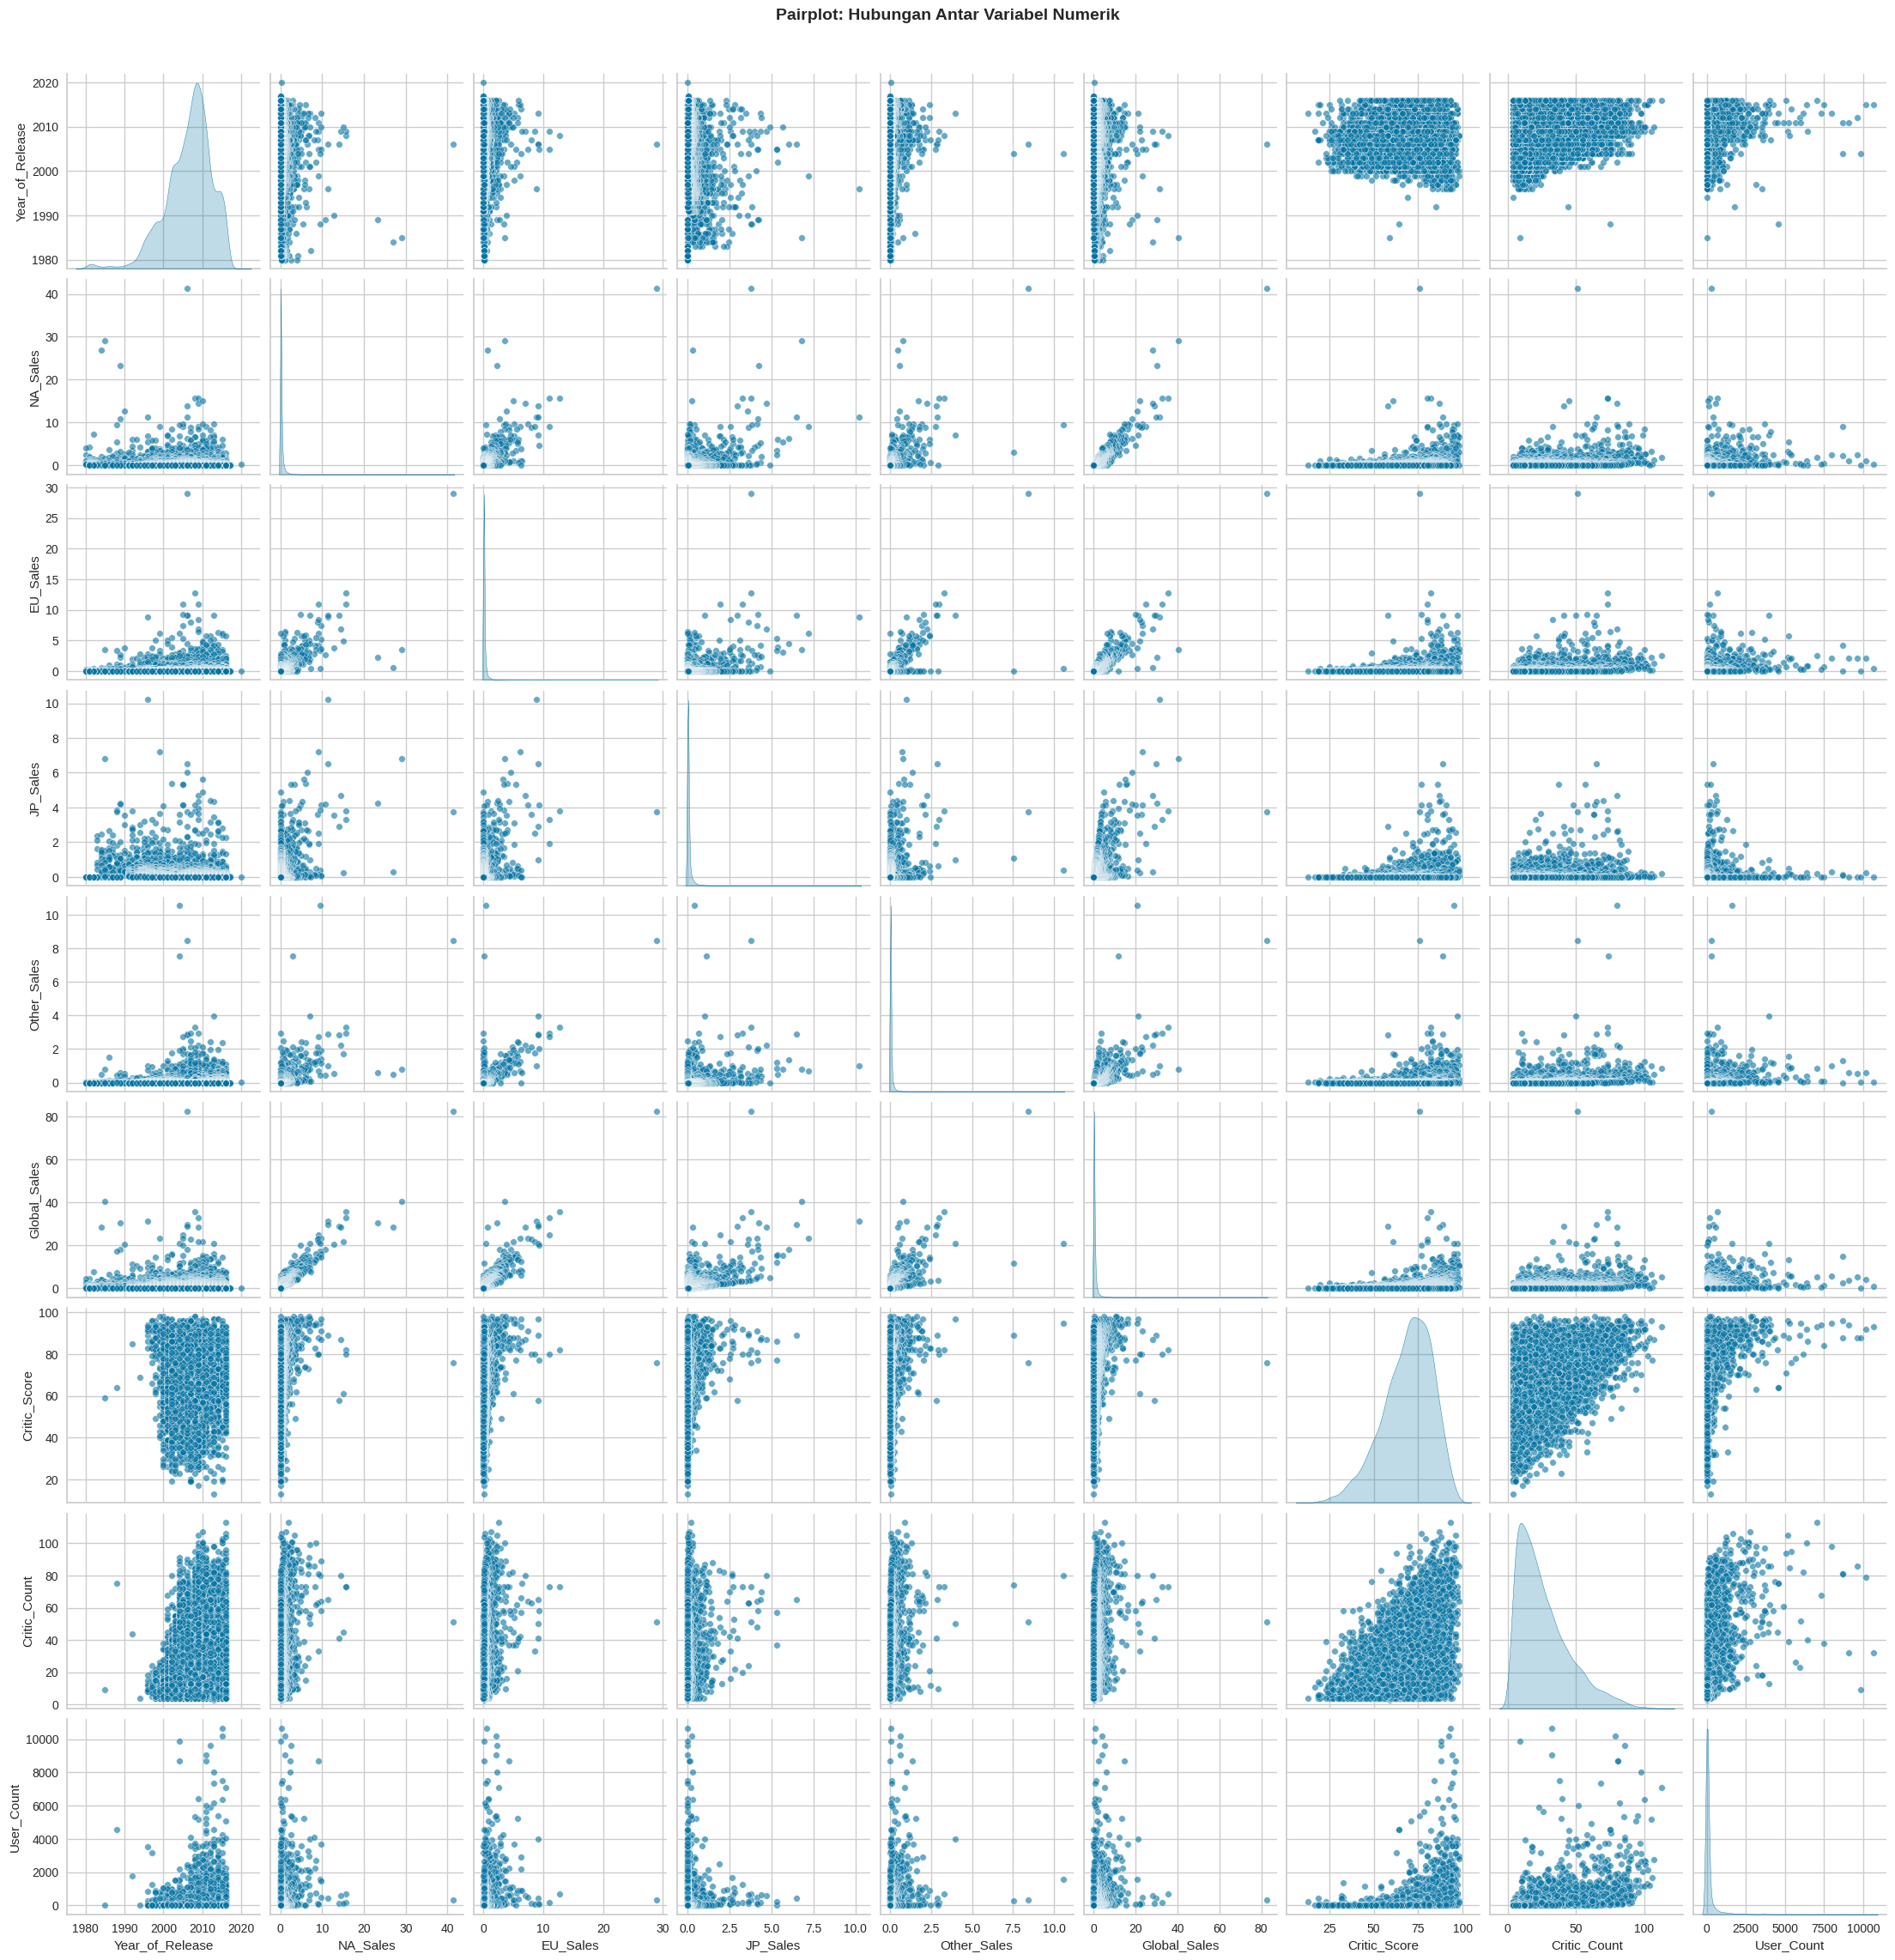

In [28]:
# Scatter plot untuk melihat hubungan antara dua variabel numerik
print("\nScatter Plot untuk Hubungan Antar Variabel Numerik:")

# Membuat pairplot dengan tampilan yang lebih informatif
pairplot = sns.pairplot(df[num_cols],
                        diag_kind="kde",  # Gunakan KDE untuk distribusi di diagonal
                        markers="o",
                        plot_kws={'alpha':0.6, 's':30})  # Transparansi dan ukuran titik

# Menambahkan judul utama untuk keseluruhan plot
pairplot.fig.suptitle("Pairplot: Hubungan Antar Variabel Numerik",
                      y=1.02, fontsize=14, fontweight='bold')

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

 **Tujuan Clustering**

**Segmentasi Game Berdasarkan Performa, Kualitas, dan Karakteristik**:

- Mengelompokkan game berdasarkan:
    - **Performa Penjualan**: `Global_Sales`.
    - **Kualitas Kritik dan Pengguna**: `Critic_Score` dan `User_Score`.
    - **Karakteristik Game**:`Genre`, `Platform`, dan `Rating`.

In [29]:
# Copy data original
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Handle value and data type

In [30]:
# Cek distribusi data user_score untuk mengatasi data tbd.
print(data['User_Score'].value_counts())
print(data[data['User_Score'] == 'tbd'])

User_Score
tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64
                                           Name Platform  Year_of_Release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16699                           Planet Monsters      GBA           2001.0   
16701                          Bust-A-Move 3000       GC           2003.0   
16702                          Mega Brain Boost       DS           2008.0   
16708                                  Plushees  

In [31]:
# Mengisi 'tbd' dengan rata-rata dari kolom User_Score
mean_score = data['User_Score'].replace('tbd', np.nan).astype(float).mean()

data['User_Score'] = data['User_Score'].replace('tbd', mean_score).astype(float)
print(data.info())
print(data['User_Score'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB
None
User_

### Handle Missing Value

In [32]:
# analisis missing value missing value
print(data.info())
print(data.isna().sum())
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB
None
Name 

Name Platform  Year_of_Release     Genre  \
12258              Cities XL 2012       PC           2011.0  Strategy   
4921   Monster Jam: Urban Assault       DS           2008.0    Racing   

                    Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
12258  Focus Home Interactive      0.01      0.05       0.0         0.01   
4921               Activision      0.36      0.00       0.0         0.03   

       Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
12258          0.07          61.0          18.0    5.600000        95.0   
4921           0.39           NaN           NaN    7.125046         NaN   

                     Developer Rating  
12258  Monte Cristo Multimedia      E  
4921               Torus Games      E

In [33]:
# Mengatasi missing value
# Drop missing value yang lebih dari 50 %

drop_data = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']

# Hapus baris yang memiliki missing value pada kolom dalam drop_data
data.dropna(subset=drop_data, inplace=True)

# Mengisi missing value fitur year_of_relase dengan mean
data['Year_of_Release'].fillna(data['Year_of_Release'].mean(), inplace=True)

# Mengatasi fitur kategorical dengan mode
data_mode = ['Name', 'Genre', 'Publisher']
for col in data_mode:
  data[col].fillna(data[col].mode()[0], inplace=True)

print(data.info())
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6947 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6947 non-null   object 
 1   Platform         6947 non-null   object 
 2   Year_of_Release  6947 non-null   float64
 3   Genre            6947 non-null   object 
 4   Publisher        6947 non-null   object 
 5   NA_Sales         6947 non-null   float64
 6   EU_Sales         6947 non-null   float64
 7   JP_Sales         6947 non-null   float64
 8   Other_Sales      6947 non-null   float64
 9   Global_Sales     6947 non-null   float64
 10  Critic_Score     6947 non-null   float64
 11  Critic_Count     6947 non-null   float64
 12  User_Score       6947 non-null   float64
 13  User_Count       6947 non-null   float64
 14  Developer        6947 non-null   object 
 15  Rating           6947 non-null   object 
dtypes: float64(10), object(6)
memory usage: 922.6+ KB
None
Name     

### Handle Duplicated Value

In [34]:
# Cek duplicated value
print('Jumlah data Duplicated:', data.duplicated().sum())

data.drop_duplicates(inplace=True)
print('Setelah mengatasi data duplicated:', data.duplicated().sum())

Jumlah data Duplicated: 0
Setelah mengatasi data duplicated: 0


### Handle Outlier Data

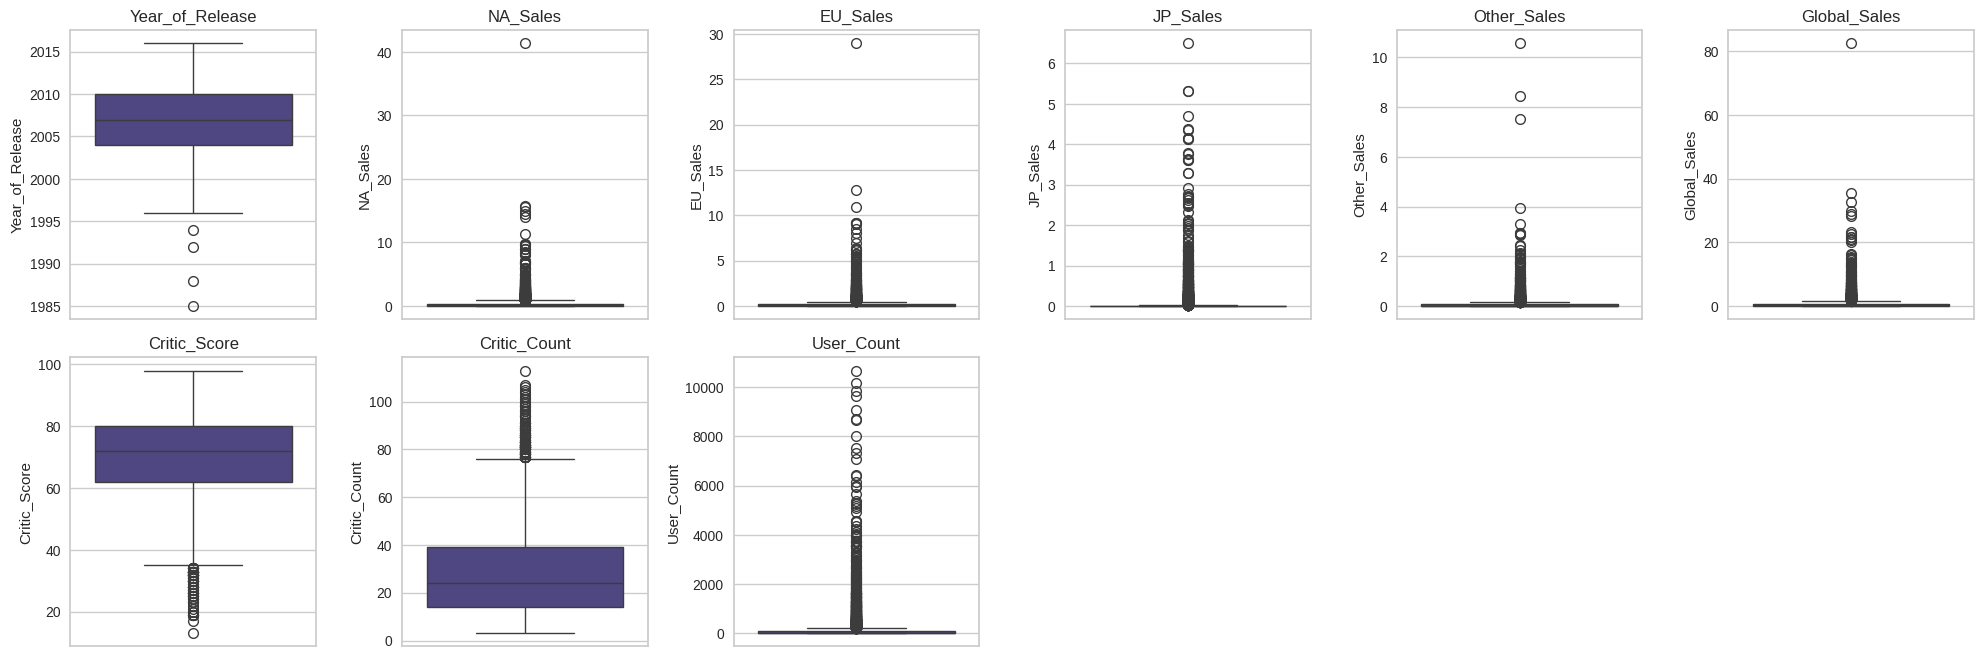

In [35]:
# Cek outlier data
# Visualisasi distribusi variabel numerik
plt.figure(figsize=(20, 10))

for i, column in enumerate(num_cols):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y=column, data=data, color='darkslateblue')
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [36]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_IQR(data):
    outlier_indices = []
    for col in data[num_cols]:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(data[(data[col] < lower_bound) | (data[col] > upper_bound)].index)
    return set(outlier_indices)

outliers = detect_outliers_IQR(data)
data = data.drop(index=outliers)

print(f'Data After Removing Outliers: {data.shape}')

Data After Removing Outliers: (4273, 16)


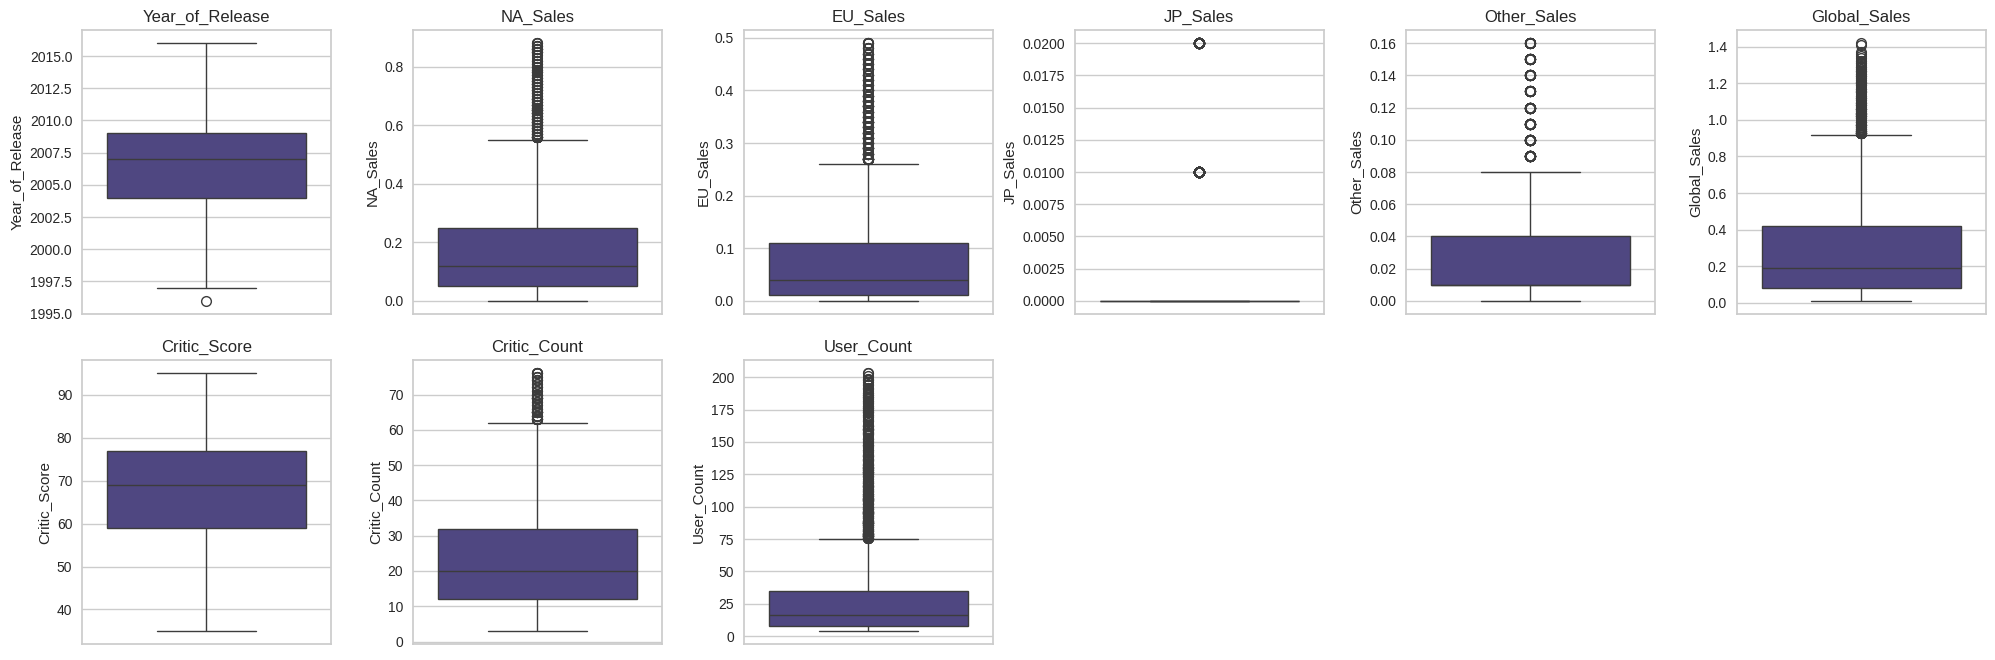

<class 'pandas.core.frame.DataFrame'>
Index: 4273 entries, 1357 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4273 non-null   object 
 1   Platform         4273 non-null   object 
 2   Year_of_Release  4273 non-null   float64
 3   Genre            4273 non-null   object 
 4   Publisher        4273 non-null   object 
 5   NA_Sales         4273 non-null   float64
 6   EU_Sales         4273 non-null   float64
 7   JP_Sales         4273 non-null   float64
 8   Other_Sales      4273 non-null   float64
 9   Global_Sales     4273 non-null   float64
 10  Critic_Score     4273 non-null   float64
 11  Critic_Count     4273 non-null   float64
 12  User_Score       4273 non-null   float64
 13  User_Count       4273 non-null   float64
 14  Developer        4273 non-null   object 
 15  Rating           4273 non-null   object 
dtypes: float64(10), object(6)
memory usage: 567.5+ KB
None


In [37]:
# Visualisasi  setelah menghapus outliers
plt.figure(figsize=(20, 10))

for i, column in enumerate(num_cols):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y=column, data=data, color='darkslateblue')
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

print(data.info())

In [38]:
data.describe()

Year_of_Release     NA_Sales    EU_Sales     JP_Sales  Other_Sales  \
count      4273.000000  4273.000000  4273.00000  4273.000000  4273.000000   
mean       2006.832183     0.179565     0.07952     0.001034     0.026747   
std           3.860473     0.179451     0.10038     0.003871     0.032084   
min        1996.000000     0.000000     0.00000     0.000000     0.000000   
25%        2004.000000     0.050000     0.01000     0.000000     0.010000   
50%        2007.000000     0.120000     0.04000     0.000000     0.010000   
75%        2009.000000     0.250000     0.11000     0.000000     0.040000   
max        2016.000000     0.880000     0.49000     0.020000     0.160000   

       Global_Sales  Critic_Score  Critic_Count   User_Score   User_Count  
count   4273.000000   4273.000000   4273.000000  4273.000000  4273.000000  
mean       0.287231     67.336532     23.539668     7.067868    30.196115  
std        0.271536     12.670098     14.715383     1.432622    36.342117  
min        0.010000     35.000000      3.000000     0.500000     4.000000  
25%        0.080000     59.000000     12.000000     6.300000     8.000000  
50%        0.190000     69.000000     20.000000     7.400000    16.000000  
75%        0.420000     77.000000     32.000000     8.100000    35.000000  
max        1.420000     95.000000     76.000000     9.600000   203.000000

### Handle Incorrect value Year

In [39]:
# Cek nilai year of release
print(data['Year_of_Release'].value_counts())

Year_of_Release
2005.000000    439
2003.000000    401
2007.000000    372
2006.000000    360
2004.000000    358
2008.000000    358
2009.000000    351
2002.000000    327
2010.000000    233
2011.000000    229
2001.000000    162
2012.000000    137
2016.000000    124
2014.000000     97
2007.437299     89
2013.000000     86
2015.000000     79
2000.000000     49
1999.000000     11
1998.000000      6
1997.000000      4
1996.000000      1
Name: count, dtype: int64


- Terdapat nilai yang salah yaitu 2007.437299	dengan jumlah data 89.

In [40]:
# Mengatasi value tahun yang salah
# Cleaning Year_of_Release
def clean_year(year):
    if pd.isna(year):
        return np.nan  # Biarkan NaN tetap ada
    year = round(year)  # Membulatkan ke tahun terdekat
    return year if 1980 <= year <= 2025 else np.nan  # Memastikan tahun masuk akal

data['Year_of_Release'] = data['Year_of_Release'].apply(clean_year)

# Mengisi NaN dengan median atau modus (tergantung kebutuhan)
median_year = data['Year_of_Release'].median()
data['Year_of_Release'].fillna(median_year, inplace=True)

# Menampilkan hasil
print(data['Year_of_Release'].value_counts())

Year_of_Release
2007    461
2005    439
2003    401
2006    360
2008    358
2004    358
2009    351
2002    327
2010    233
2011    229
2001    162
2012    137
2016    124
2014     97
2013     86
2015     79
2000     49
1999     11
1998      6
1997      4
1996      1
Name: count, dtype: int64


### Binning Data

In [41]:
# Looping untuk menampilkan unique values dan value counts dari setiap kolom dalam dataframe
# untuk menganalisis sebelum binning data
for col in data.columns:
    print(f'\n====== {col} =========\n', data[col].unique())
    print(data[col].value_counts())


====== Name =========
 ['Tiger Woods PGA Tour 09 All-Play' "Sonic's Ultimate Genesis Collection"
 'Call of Duty: Black Ops' ... 'E.T. The Extra-Terrestrial' 'Breach'
 'STORM: Frontline Nation']
Name
Harry Potter and the Order of the Phoenix    7
Spider-Man 3                                 7
FIFA World Cup Germany 2006                  6
Tomb Raider: Legend                          6
X-Men: The Official Game                     6
                                            ..
Asphalt: Injection                           1
Dishonored 2                                 1
Aliens vs Predator: Requiem                  1
Magna Carta: Tears of Blood                  1
STORM: Frontline Nation                      1
Name: count, Length: 2863, dtype: int64

====== Platform =========
 ['Wii' 'X360' 'XB' 'DS' 'PS2' 'PS' 'GC' 'GBA' 'PS3' '3DS' 'PSP' 'XOne'
 'PS4' 'WiiU' 'PC' 'PSV']
Platform
PS2     771
X360    567
XB      520
PS3     379
Wii     307
GC      300
PC      288
DS      281
PSP     243
G

In [42]:
# Drop fitur Unique dan data tentang penjualan diwilayah benua
X_data = data.drop(columns=['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
print(X_data.info())
X_data.sample(2)

<class 'pandas.core.frame.DataFrame'>
Index: 4273 entries, 1357 to 16706
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         4273 non-null   object 
 1   Year_of_Release  4273 non-null   int64  
 2   Genre            4273 non-null   object 
 3   Global_Sales     4273 non-null   float64
 4   Critic_Score     4273 non-null   float64
 5   Critic_Count     4273 non-null   float64
 6   User_Score       4273 non-null   float64
 7   User_Count       4273 non-null   float64
 8   Rating           4273 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 333.8+ KB
None


Platform  Year_of_Release   Genre  Global_Sales  Critic_Score  \
9109       Wii             2011  Sports          0.14          54.0   
13302       XB             2004  Action          0.05          84.0   

       Critic_Count  User_Score  User_Count Rating  
9109            8.0         7.4         7.0      E  
13302          37.0         8.3        16.0      M

In [43]:
# menganalisis fitur sebelum binning data
for col in X_data.columns:
    print(f'\n====== {col} =========\n', X_data[col].unique())
    print(X_data[col].value_counts())


====== Platform =========
 ['Wii' 'X360' 'XB' 'DS' 'PS2' 'PS' 'GC' 'GBA' 'PS3' '3DS' 'PSP' 'XOne'
 'PS4' 'WiiU' 'PC' 'PSV']
Platform
PS2     771
X360    567
XB      520
PS3     379
Wii     307
GC      300
PC      288
DS      281
PSP     243
GBA     179
PS4     108
XOne     97
PS       80
3DS      60
PSV      47
WiiU     46
Name: count, dtype: int64

====== Year_of_Release =========
 [2008 2009 2010 2004 2005 2013 2012 2007 2003 2014 2011 2000 2001 1997
 2002 2006 2016 1998 2015 1999 1996]
Year_of_Release
2007    461
2005    439
2003    401
2006    360
2008    358
2004    358
2009    351
2002    327
2010    233
2011    229
2001    162
2012    137
2016    124
2014     97
2013     86
2015     79
2000     49
1999     11
1998      6
1997      4
1996      1
Name: count, dtype: int64

====== Genre =========
 ['Sports' 'Misc' 'Shooter' 'Puzzle' 'Platform' 'Racing' 'Action'
 'Role-Playing' 'Fighting' 'Strategy' 'Simulation' 'Adventure']
Genre
Action          1013
Sports           713
Shooter  

In [44]:
# Binning Dataset

# Membuat inisialisasi untuk binnning variabel Numerical

# 1. Binning 'Global_Sales'
# Binning untuk Global_Sales
sales_bins = [0, 0.5, 1.0, 1.5]
sales_cat = ['Low', 'Medium', 'High']
X_data['global_sales_bin'] = pd.cut(X_data['Global_Sales'], bins=sales_bins, labels=sales_cat)

# 2. Binning 'Critic_Score'
critic_bins = [0, 50, 80, 100]
critic_cat = ['Poor', 'Good', 'Excellent']
X_data['critic_score_bin'] = pd.cut(X_data['Critic_Score'], bins=critic_bins, labels=critic_cat)

# 3. Binning 'Critic_Count'
critic_count = [0, 40, 60, 80]
critic_count_label = ['Low', 'Medium', 'High']
X_data['critic_count_bin'] = pd.cut(X_data['Critic_Count'], bins=critic_count, labels=critic_count_label)

# 4. Binning 'User_Score'
user_bins = [0, 6, 8, 10]
user_cat = ['Bad', 'Good', 'Excellent']
X_data['user_score_bin'] = pd.cut(X_data['User_Score'], bins=user_bins, labels=user_cat)

# 5. Binning 'User_Count'
user_count = [0, 50, 100, 150, 205]
user_counts_label = ['Low', 'Medium', 'High', 'Very High']
X_data['user_count_bin'] = pd.cut(X_data['User_Count'], bins=user_count, labels=user_counts_label)

# 6. Binning Year_of_Release (Berdasarkan dekade)
year_bins = [1980, 1990, 2000, 2010, 2020]
year_labels = ['1980s', '1990s', '2000s', '2010s']
X_data['year_bin'] = pd.cut(X_data['Year_of_Release'], bins=year_bins, labels=year_labels)

# Membuat inisialisasi untuk binnning variabel Kategorical
# 1. Binning 'genre'
genre_bins = {
    'Action-Based': ['Action', 'Adventure'],
    'Shooter-Based': ['Shooter', 'Fighting'],
    'Sport-Based':['Sports', 'Racing'],
    'Strategy-Based': ['Role-Playing', 'Strategy'],
    'Casual-Based': ['Puzzle', 'Misc', 'Simulation', 'Platform']
}

# fungsi bining genre
def map_genre_bins(genre):
    for category, genres in genre_bins.items():
        if genre in genres:
            return category
    return 'others'

# Terapkan binning ke kolom 'genre'
X_data['genre_bin'] = X_data['Genre'].apply(map_genre_bins)

# 2. Binning 'platform' berdasarkan jenis konsol
console = {
    'PlayStation': ['PS2', 'PS3', 'PS4', 'PS5'],
    'Xbox': ['Xbox', 'Xbox 360', 'Xbox One'],
    'Nintendo': ['Switch', 'Wii', 'Wii U', 'DS'],
    'PC': ['PC']
}

def map_platform_to_bin(platform):
    for category, platforms in console.items():
        if platform in platforms:
            return category
    return 'Other'

X_data['platform_bin'] = X_data['Platform'].apply(map_platform_to_bin)


# Menghapus kolom lama dan hanya menyimpan hasil binning
X_data = X_data[['platform_bin', 'year_bin', 'genre_bin',
                 'global_sales_bin', 'critic_score_bin', 'critic_count_bin',
                 'user_score_bin', 'user_count_bin', 'Rating']]

# Menampilkan hasil
X_data.head()

platform_bin year_bin      genre_bin global_sales_bin critic_score_bin  \
1357     Nintendo    2000s    Sport-Based             High        Excellent   
1366        Other    2000s   Casual-Based             High             Good   
1412     Nintendo    2000s  Shooter-Based             High             Good   
1419        Other    2000s  Shooter-Based             High             Good   
1432     Nintendo    2000s   Casual-Based             High             Good   

     critic_count_bin user_score_bin user_count_bin Rating  
1357              Low      Excellent            Low      E  
1366           Medium      Excellent            Low   E10+  
1412              Low            Bad         Medium      M  
1419           Medium      Excellent         Medium      T  
1432              Low      Excellent            Low      E

In [45]:
# menganalisis fitur sebelum binning data
for col in X_data.columns:
    print(f'\n====== {col} =========\n', X_data[col].value_counts())


====== platform_bin =========
 platform_bin
Other          2139
PlayStation    1258
Nintendo        588
PC              288
Name: count, dtype: int64

====== year_bin =========
 year_bin
2000s    3450
2010s     752
1990s      71
1980s       0
Name: count, dtype: int64

====== genre_bin =========
 genre_bin
Action-Based      1196
Sport-Based       1143
Casual-Based       781
Shooter-Based      705
Strategy-Based     448
Name: count, dtype: int64

====== global_sales_bin =========
 global_sales_bin
Low       3459
Medium     701
High       113
Name: count, dtype: int64

====== critic_score_bin =========
 critic_score_bin
Good         3127
Excellent     635
Poor          511
Name: count, dtype: int64

====== critic_count_bin =========
 critic_count_bin
Low       3667
Medium     509
High        97
Name: count, dtype: int64

====== user_score_bin =========
 user_score_bin
Good         2194
Excellent    1172
Bad           907
Name: count, dtype: int64

====== user_count_bin =========
 user_c

### Encoding Data

In [46]:
# Salin dataset untuk menyimpan hasil encoding
X_encode = X_data.copy()

# Fitur untuk Label Encoding
label_features = ['global_sales_bin', 'critic_score_bin', 'critic_count_bin', 'user_score_bin', 'user_count_bin']

# Fitur untuk One-Hot Encoding
one_hot_features = ['year_bin', 'platform_bin', 'genre_bin', 'Rating']

# 1. Label Encoding
le = LabelEncoder()
for col in label_features:
    X_encode[col] = le.fit_transform(X_encode[col])

# 2. One-Hot Encoding
X_encode = pd.get_dummies(X_encode, columns=one_hot_features, drop_first=True).astype(int)

# menganalisis fitur sebelum binning data
for col in X_encode.columns:
    print(f'\n====== {col} =========\n', X_encode[col].value_counts())

# Menampilkan hasil
X_encode.sample(2)



====== global_sales_bin =========
 global_sales_bin
1    3459
2     701
0     113
Name: count, dtype: int64

====== critic_score_bin =========
 critic_score_bin
1    3127
0     635
2     511
Name: count, dtype: int64

====== critic_count_bin =========
 critic_count_bin
1    3667
2     509
0      97
Name: count, dtype: int64

====== user_score_bin =========
 user_score_bin
2    2194
1    1172
0     907
Name: count, dtype: int64

====== user_count_bin =========
 user_count_bin
1    3542
2     449
0     181
3     101
Name: count, dtype: int64

====== year_bin_1990s =========
 year_bin_1990s
0    4202
1      71
Name: count, dtype: int64

====== year_bin_2000s =========
 year_bin_2000s
1    3450
0     823
Name: count, dtype: int64

====== year_bin_2010s =========
 year_bin_2010s
0    3521
1     752
Name: count, dtype: int64

====== platform_bin_Other =========
 platform_bin_Other
1    2139
0    2134
Name: count, dtype: int64

====== platform_bin_PC =========
 platform_bin_PC
0    3985
1   

global_sales_bin  critic_score_bin  critic_count_bin  user_score_bin  \
7702                 1                 1                 1               1   
8403                 1                 1                 1               2   

      user_count_bin  year_bin_1990s  year_bin_2000s  year_bin_2010s  \
7702               1               0               1               0   
8403               1               0               1               0   

      platform_bin_Other  platform_bin_PC  platform_bin_PlayStation  \
7702                   0                0                         0   
8403                   1                0                         0   

      genre_bin_Casual-Based  genre_bin_Shooter-Based  genre_bin_Sport-Based  \
7702                       0                        0                      0   
8403                       0                        0                      0   

      genre_bin_Strategy-Based  Rating_E10+  Rating_M  Rating_RP  Rating_T  
7702                         0            1         0          0         0  
8403                         0            1         0          0         0

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [47]:
X_model = X_encode.copy()
print(X_model.info())
X_model.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4273 entries, 1357 to 16706
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   global_sales_bin          4273 non-null   int64
 1   critic_score_bin          4273 non-null   int64
 2   critic_count_bin          4273 non-null   int64
 3   user_score_bin            4273 non-null   int64
 4   user_count_bin            4273 non-null   int64
 5   year_bin_1990s            4273 non-null   int64
 6   year_bin_2000s            4273 non-null   int64
 7   year_bin_2010s            4273 non-null   int64
 8   platform_bin_Other        4273 non-null   int64
 9   platform_bin_PC           4273 non-null   int64
 10  platform_bin_PlayStation  4273 non-null   int64
 11  genre_bin_Casual-Based    4273 non-null   int64
 12  genre_bin_Shooter-Based   4273 non-null   int64
 13  genre_bin_Sport-Based     4273 non-null   int64
 14  genre_bin_Strategy-Based  4273 non-null  

global_sales_bin  critic_score_bin  critic_count_bin  user_score_bin  \
count       4273.000000       4273.000000       4273.000000     4273.000000   
mean           1.137608          0.970981          1.096419        1.301194   
std            0.414249          0.517123          0.364081        0.796963   
min            0.000000          0.000000          0.000000        0.000000   
25%            1.000000          1.000000          1.000000        1.000000   
50%            1.000000          1.000000          1.000000        2.000000   
75%            1.000000          1.000000          1.000000        2.000000   
max            2.000000          2.000000          2.000000        2.000000   

       user_count_bin  year_bin_1990s  year_bin_2000s  year_bin_2010s  \
count     4273.000000     4273.000000     4273.000000     4273.000000   
mean         1.109993        0.016616        0.807395        0.175989   
std          0.479521        0.127842        0.394391        0.380855   
min          0.000000        0.000000        0.000000        0.000000   
25%          1.000000        0.000000        1.000000        0.000000   
50%          1.000000        0.000000        1.000000        0.000000   
75%          1.000000        0.000000        1.000000        0.000000   
max          3.000000        1.000000        1.000000        1.000000   

       platform_bin_Other  platform_bin_PC  platform_bin_PlayStation  \
count         4273.000000      4273.000000               4273.000000   
mean             0.500585         0.067400                  0.294407   
std              0.500058         0.250743                  0.455829   
min              0.000000         0.000000                  0.000000   
25%              0.000000         0.000000                  0.000000   
50%              1.000000         0.000000                  0.000000   
75%              1.000000         0.000000                  1.000000   
max              1.000000         1.000000                  1.000000   

       genre_bin_Casual-Based  genre_bin_Shooter-Based  genre_bin_Sport-Based  \
count             4273.000000              4273.000000            4273.000000   
mean                 0.182776                 0.164989               0.267494   
std                  0.386528                 0.371214               0.442704   
min                  0.000000                 0.000000               0.000000   
25%                  0.000000                 0.000000               0.000000   
50%                  0.000000                 0.000000               0.000000   
75%                  0.000000                 0.000000               1.000000   
max                  1.000000                 1.000000               1.000000   

       genre_bin_Strategy-Based  Rating_E10+     Rating_M    Rating_RP  \
count               4273.000000  4273.000000  4273.000000  4273.000000   
mean                   0.104844     0.153054     0.157735     0.000468   
std                    0.306389     0.360082     0.364535     0.021632   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.000000     0.000000     0.000000     0.000000   
50%                    0.000000     0.000000     0.000000     0.000000   
75%                    0.000000     0.000000     0.000000     0.000000   
max                    1.000000     1.000000     1.000000     1.000000   

          Rating_T  
count  4273.000000  
mean      0.350105  
std       0.477059  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [48]:
# inisialisasi algoritma kmeans
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_labels = kmeans.fit_predict(X_model)

X_model['cluster'] = kmeans_labels
X_model['cluster'].value_counts()

cluster
1    1715
2    1642
0     916
Name: count, dtype: int64

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

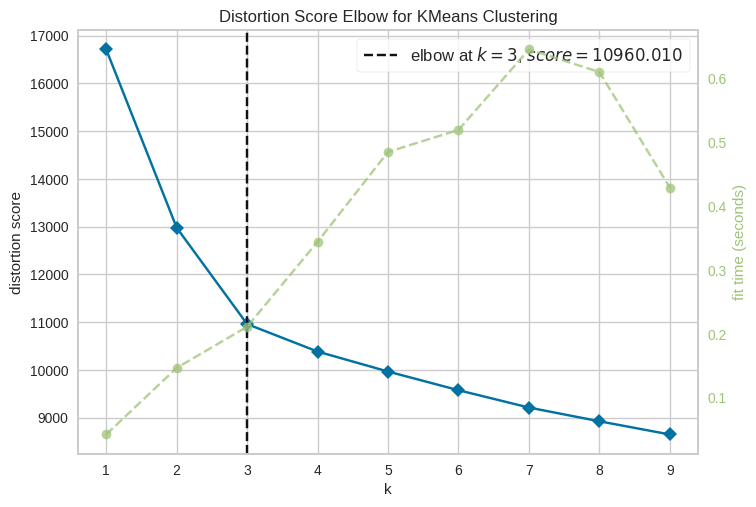

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_model)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

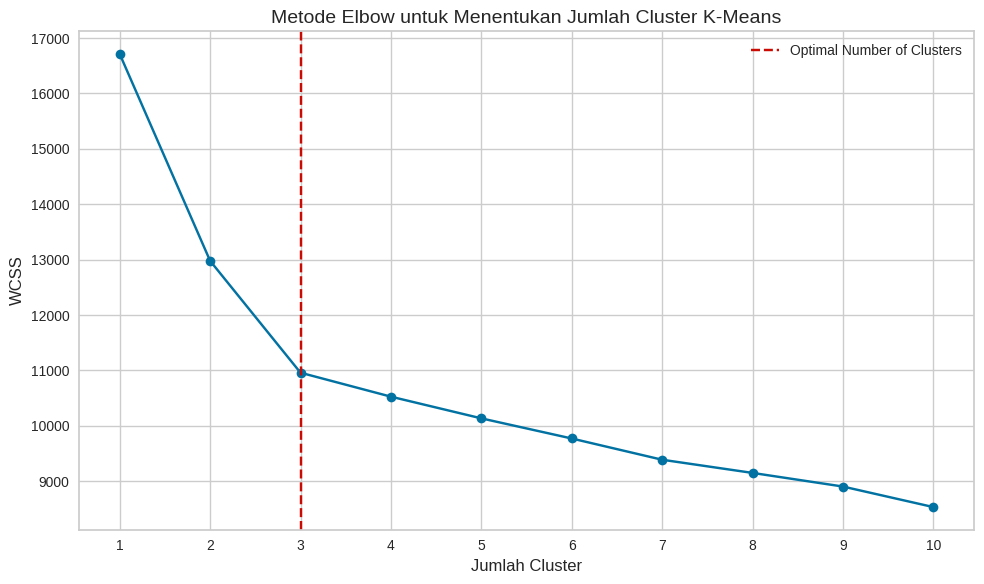

In [50]:
# Visualisasi Elbow untuk menentukan jumlah cluster optimal
n_clusters = range(1, 11)
wcss = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_model)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, wcss, marker='o', color='b', linestyle='-')
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster K-Means', fontsize=14)
plt.grid(True)
plt.xticks(n_clusters)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [51]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(X_model, kmeans_labels)

# Menghitung Davies-Bouldin Score
kmeans_db_score = davies_bouldin_score(X_model, kmeans_labels)

# Menyusun hasil clustering
clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette],
    'Davies-Bouldin Score': [kmeans_db_score]
})

clustering_scores

Clustering Method  Silhouette Score  Davies-Bouldin Score
0           K-Means          0.206374              1.826662

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [52]:
features = X_model.drop(columns=['cluster'])  # Hanya gunakan fitur numerik
selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = selector.fit_transform(features, kmeans_labels)

print("Jumlah fitur sebelum seleksi:", features.shape[1])
print("Jumlah fitur setelah seleksi:", X_selected.shape[1])

selected_features = features.columns[selector.get_support()]
print("Fitur terpilih setelah feature selection:", selected_features)

Jumlah fitur sebelum seleksi: 19
Jumlah fitur setelah seleksi: 2
Fitur terpilih setelah feature selection: Index(['user_score_bin', 'platform_bin_Other'], dtype='object')


In [53]:
# Clustering ulang dengan fitur terpilih
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_labels_selected = kmeans.fit_predict(X_selected)

# Evaluasi clustering ulang
silhouette_selected = silhouette_score(X_selected, kmeans_labels_selected)
db_score_selected = davies_bouldin_score(X_selected, kmeans_labels_selected)

# Menyusun ulang hasil clustering setelah feature selection
clustering_scores_selected = pd.DataFrame({
    'Clustering Method': ['K-Means (Selected Features)'],
    'Silhouette Score': [silhouette_selected],
    'Davies-Bouldin Score': [db_score_selected]
})
clustering_scores_selected

Clustering Method  Silhouette Score  Davies-Bouldin Score
0  K-Means (Selected Features)          0.631934               0.79012

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

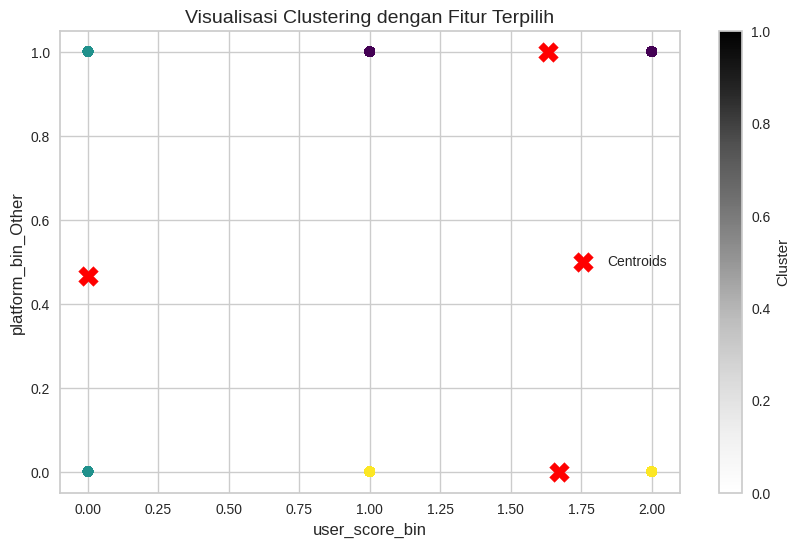

In [54]:
# Data setelah feature selection

# Plot hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=kmeans_labels_selected, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Visualisasi Clustering dengan Fitur Terpilih', fontsize=14)
plt.xlabel('user_score_bin', fontsize=12)
plt.ylabel('platform_bin_Other', fontsize=12)
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

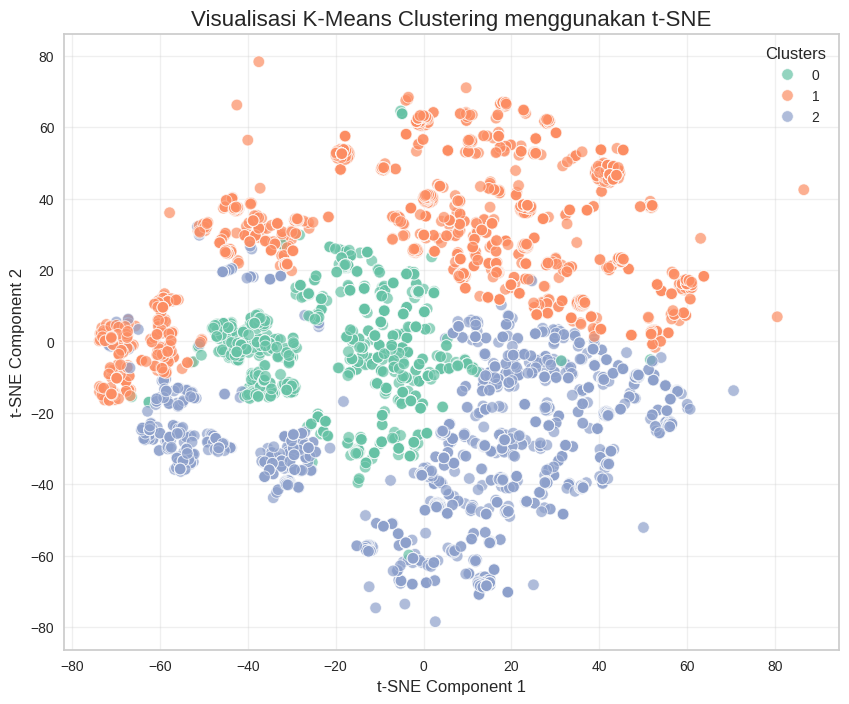

In [55]:
# Pastikan hanya menggunakan fitur numerik (tanpa 'cluster')

# Reduksi dimensi dengan t-SNE
# tsne = TSNE(n_components=2, random_state=42)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(features)

# Konversi kembali ke DataFrame untuk visualisasi
df_tsne = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
df_tsne['Cluster'] = X_model['cluster'].values

# Visualisasi hasil clustering dengan t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='t-SNE 1', y='t-SNE 2',
    hue='Cluster',
    palette='Set2',
    data=df_tsne,
    alpha=0.7,
    s=70
)

plt.title("Visualisasi K-Means Clustering menggunakan t-SNE", fontsize=16)
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.legend(title="Clusters", loc="upper right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [56]:
# Bandingkan Performa Model Sebelum dan Sesudah Feature Selection
print("\n=== Perbandingan Performa Model ===")
print(f"Silhouette Score sebelum feature selection: {kmeans_silhouette:.2f}")
print(f"Silhouette Score setelah feature selection: {silhouette_selected:.2f}")

if silhouette_selected > kmeans_silhouette:
    print("Feature selection meningkatkan performa model.")
else:
    print("Feature selection tidak meningkatkan performa model.")


=== Perbandingan Performa Model ===
Silhouette Score sebelum feature selection: 0.21
Silhouette Score setelah feature selection: 0.63
Feature selection meningkatkan performa model.


In [57]:
X_model.head()

global_sales_bin  critic_score_bin  critic_count_bin  user_score_bin  \
1357                 0                 0                 1               1   
1366                 0                 1                 2               1   
1412                 0                 1                 1               0   
1419                 0                 1                 2               1   
1432                 0                 1                 1               1   

      user_count_bin  year_bin_1990s  year_bin_2000s  year_bin_2010s  \
1357               1               0               1               0   
1366               1               0               1               0   
1412               2               0               1               0   
1419               2               0               1               0   
1432               1               0               1               0   

      platform_bin_Other  platform_bin_PC  platform_bin_PlayStation  \
1357                   0                0                         0   
1366                   1                0                         0   
1412                   0                0                         0   
1419                   1                0                         0   
1432                   0                0                         0   

      genre_bin_Casual-Based  genre_bin_Shooter-Based  genre_bin_Sport-Based  \
1357                       0                        0                      1   
1366                       1                        0                      0   
1412                       0                        1                      0   
1419                       0                        1                      0   
1432                       1                        0                      0   

      genre_bin_Strategy-Based  Rating_E10+  Rating_M  Rating_RP  Rating_T  \
1357                         0            0         0          0         0   
1366                         0            1         0          0         0   
1412                         0            0         1          0         0   
1419                         0            0         0          0         1   
1432                         0            0         0          0         0   

      cluster  
1357        2  
1366        1  
1412        0  
1419        1  
1432        2

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [58]:
#Inverse Transform untuk Label Encoding
# Buat dictionary untuk menyimpan LabelEncoder yang sudah di-fit
label_encoders = {}

# Fitur yang di-encode dengan Label Encoding
label_features = ['global_sales_bin', 'critic_score_bin', 'critic_count_bin', 'user_score_bin', 'user_count_bin']

# Inverse transform untuk setiap fitur
for col in label_features:
    le = LabelEncoder()
    le.fit(X_data[col])  # Fit dengan data setelah binning
    data[col + '_inverse'] = le.inverse_transform(X_model[col])  # Inverse transform
    label_encoders[col] = le  # Simpan encoder untuk referensi

# Inverse Transform untuk One-Hot Encoding
# Fitur yang di-encode dengan One-Hot Encoding
one_hot_features = ['year_bin', 'platform_bin', 'genre_bin', 'Rating']

# Gabungkan kembali kolom One-Hot Encoding ke bentuk kategorikal asli
for col in one_hot_features:
    # Ambil kolom One-Hot Encoding yang sesuai
    one_hot_cols = [c for c in X_model.columns if c.startswith(col)]

    # Gunakan argmax untuk mendapatkan nilai asli
    data[col + '_inverse'] = X_model[one_hot_cols].idxmax(axis=1).str.replace(col + '_', '')

# Gabungkan Hasil Clustering dengan Data Asli
# Tambahkan label cluster ke data asli
data['cluster'] = kmeans_labels  # kmeans_labels adalah hasil clustering

data.head()

Name Platform  Year_of_Release    Genre  \
1357     Tiger Woods PGA Tour 09 All-Play      Wii             2008   Sports   
1366  Sonic's Ultimate Genesis Collection     X360             2009     Misc   
1412              Call of Duty: Black Ops      Wii             2010  Shooter   
1419           Tom Clancy's Ghost Recon 2       XB             2004  Shooter   
1432                       Gardening Mama       DS             2009   Puzzle   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1357  Electronic Arts      0.80      0.47      0.00         0.14   
1366             Sega      0.85      0.43      0.00         0.13   
1412       Activision      0.80      0.45      0.00         0.12   
1419          Ubisoft      0.86      0.45      0.00         0.06   
1432        505 Games      0.79      0.42      0.01         0.13   

      Global_Sales  ...  global_sales_bin_inverse  critic_score_bin_inverse  \
1357          1.42  ...                      High                 Excellent   
1366          1.41  ...                      High                      Good   
1412          1.37  ...                      High                      Good   
1419          1.36  ...                      High                      Good   
1432          1.35  ...                      High                      Good   

      critic_count_bin_inverse  user_score_bin_inverse user_count_bin_inverse  \
1357                       Low               Excellent                    Low   
1366                    Medium               Excellent                    Low   
1412                       Low                     Bad                 Medium   
1419                    Medium               Excellent                 Medium   
1432                       Low               Excellent                    Low   

     year_bin_inverse platform_bin_inverse genre_bin_inverse Rating_inverse  \
1357            2000s                Other       Sport-Based           E10+   
1366            2000s                Other      Casual-Based           E10+   
1412            2000s                Other     Shooter-Based              M   
1419            2000s                Other     Shooter-Based              T   
1432            2000s                Other      Casual-Based           E10+   

     cluster  
1357       2  
1366       1  
1412       0  
1419       1  
1432       2  

[5 rows x 26 columns]

In [59]:
# Hapus kolom setelah inverse transform
columns_to_drop = ['global_sales_bin_inverse', 'critic_score_bin_inverse', 'critic_count_bin_inverse', 'user_score_bin_inverse', 'user_count_bin_inverse',
                   'year_bin_inverse', 'platform_bin_inverse', 'genre_bin_inverse', 'Rating_inverse']
data.drop(columns=columns_to_drop, inplace=True)

# Tampilkan data setelah pembersihan
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4273 entries, 1357 to 16706
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4273 non-null   object 
 1   Platform         4273 non-null   object 
 2   Year_of_Release  4273 non-null   int64  
 3   Genre            4273 non-null   object 
 4   Publisher        4273 non-null   object 
 5   NA_Sales         4273 non-null   float64
 6   EU_Sales         4273 non-null   float64
 7   JP_Sales         4273 non-null   float64
 8   Other_Sales      4273 non-null   float64
 9   Global_Sales     4273 non-null   float64
 10  Critic_Score     4273 non-null   float64
 11  Critic_Count     4273 non-null   float64
 12  User_Score       4273 non-null   float64
 13  User_Count       4273 non-null   float64
 14  Developer        4273 non-null   object 
 15  Rating           4273 non-null   object 
 16  cluster          4273 non-null   int32  
dtypes: float64(9), 

Name Platform  Year_of_Release    Genre  \
1357     Tiger Woods PGA Tour 09 All-Play      Wii             2008   Sports   
1366  Sonic's Ultimate Genesis Collection     X360             2009     Misc   
1412              Call of Duty: Black Ops      Wii             2010  Shooter   
1419           Tom Clancy's Ghost Recon 2       XB             2004  Shooter   
1432                       Gardening Mama       DS             2009   Puzzle   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
1357  Electronic Arts      0.80      0.47      0.00         0.14   
1366             Sega      0.85      0.43      0.00         0.13   
1412       Activision      0.80      0.45      0.00         0.12   
1419          Ubisoft      0.86      0.45      0.00         0.06   
1432        505 Games      0.79      0.42      0.01         0.13   

      Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count  \
1357          1.42          81.0          18.0         8.7        34.0   
1366          1.41          79.0          45.0         8.5        40.0   
1412          1.37          80.0          25.0         5.8        87.0   
1419          1.36          80.0          53.0         8.9        58.0   
1432          1.35          60.0          17.0         9.3         4.0   

                    Developer Rating  cluster  
1357               EA Tiburon      E        2  
1366   Backbone Entertainment   E10+        1  
1412                 Treyarch      M        0  
1419  Red Storm Entertainment      T        1  
1432        Taito Corporation      E        2

Analisis Data setelah di inversi:

- Total kolom yaitu terdapat 16 kolom fitur dan 1 kolom target yaitu 'cluster'
- tidak terdapat missing value dan tipe data yang salah pada data

In [60]:
# Analisis Karakteristik Cluster
# Analisis agregasi untuk fitur numerik
numerical_columns = data.select_dtypes(include=['number']).columns
cluster_analysis_numerical = data.groupby('cluster')[numerical_columns].agg(['mean', 'min', 'max'])

# Menampilkan semua kolom dan baris tanpa terpotong
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Analisis Agregasi Fitur Numerik:")
print(cluster_analysis_numerical)

Analisis Agregasi Fitur Numerik:
        Year_of_Release              NA_Sales             EU_Sales             \
                   mean   min   max      mean  min   max      mean  min   max   
cluster                                                                         
0           2008.217249  2000  2016  0.149782  0.0  0.87  0.068002  0.0  0.48   
1           2006.074052  1996  2016  0.202612  0.0  0.88  0.075685  0.0  0.49   
2           2006.827649  2000  2016  0.172107  0.0  0.88  0.089951  0.0  0.49   

         JP_Sales            Other_Sales            Global_Sales              \
             mean  min   max        mean  min   max         mean   min   max   
cluster                                                                        
0        0.000786  0.0  0.02    0.023745  0.0  0.16     0.242434  0.01  1.37   
1        0.001114  0.0  0.02    0.019493  0.0  0.16     0.299242  0.01  1.41   
2        0.001090  0.0  0.02    0.035999  0.0  0.16     0.299677  0.01  1.42   


Insight Agregasi fitur numeric:

1. Cluster 0
  - rata-rata tahun release game yaitu tahun 2008 dengan rentang tahun 2000 - 2016
  - NA_sales (Amerika) memiliki jumlah rata penjualan 149ribu copy games, nilai tersebut lebih tinggi dibandingkan EU_sales (Europe) 68 ribu copy, JP_Sales (Jepang) 7 ratus copy, dan other sales 23 ribu copy.
  - Penjualan games secara global memiliki rata-rata penjualan 242 ribu copy dengan maksimal penjualan sebanyak 1,37 juta copy games
  - jumlah rata-rata kritik pada cluster ini sekitar 56 score dengan jumlah kritik pengguna sebanyak 18 juta orang. hasil tersebut cukup rendah dibandingkan cluster lain
  - Jumlah rata-rata user score yaitu 4.9 dari total user yang melakukan penilai sebanyak 27 juta. NIlai user score tersebut sangat rendah dibandingkan dengan cluster lain

2. Cluster 1
  - rata-rata tahun release game yaitu tahun 2006 dengan rentang tahun 1996 - 2016
  - NA_sales (Amerika) memiliki jumlah rata penjualan 202 ribu copy games, nilai tersebut lebih tinggi dibandingkan penjualan negara lain. EU_sales (Europe) 75 ribu copy, JP_Sales (Jepang)  1 ribu copy, dan other sales 19 ribu copy.
  - Penjualan games secara global memiliki rata-rata penjualan 299,24 ribu copy dengan maksimal penjualan sebanyak 1,41 juta lebih copy games
  - jumlah rata-rata kritik pada cluster ini sekitar 71 dari rentang 100, total yang melakukan critic sebanyak 25 juta.
  - Jumlah rata-rata user score yaitu 7.6 dari rentang 10, total user yang melakukan penilai sebanyak 29 juta.

3. Cluster 2
  - rata-rata tahun release game yaitu tahun 2006 dengan rentang tahun 1996 - 2016
  - NA_sales (Amerika) memiliki jumlah rata-rata penjualan tertinggi sebanyak 172 ribu copy games sementara JP_Sales (Jepang) memiliki jumlah rata-rata penjualan terendah sekitar 1 ribu copy.
  - Penjualan games secara global memiliki jumlah rata-rata penjualan tertinggi sebesar 299,67 ribu copy dengan penjualan tertinggi sebesar 1.42 juta copy
  - jumlah rata-rata kritik pada cluster ini sekitar 69 dari rentang 100, total yang melakukan critic sebanyak 23 juta.
  - Jumlah rata-rata user score yaitu 7.6 dari rentang 10, total user yang melakukan penilai sebanyak 32 juta.

In [61]:
# Analisis agregasi untuk fitur kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns
cluster_analysis_categorical = data.groupby('cluster')[categorical_columns].agg(lambda x: x.mode()[0])
print("\nAnalisis Agregasi Fitur Kategorikal:")
print(cluster_analysis_categorical)


Analisis Agregasi Fitur Kategorikal:
                                                  Name Platform   Genre  \
cluster                                                                   
0        Harry Potter and the Deathly Hallows - Part 1     X360  Action   
1                          FIFA World Cup Germany 2006       XB  Action   
2            Harry Potter and the Order of the Phoenix      PS2  Action   

               Publisher  Developer Rating  
cluster                                     
0        Electronic Arts  EA Sports      E  
1        Electronic Arts  EA Canada      T  
2        Electronic Arts  EA Canada      T  


Insight Agregasi fitur kategorical:

1. Cluster 0:
  - Cluster ini memiliki pembelian games yang banyak pada game Harry Potter and the Deathly Hallows - Part 1, platform yang banyak digunakan yaitu X360. Mayoritas orang-orang di clusteri ni menyukai genre game Action. Publisher game terbanyak yaitu ELectronic Arts. Developer games yang paling banyak yaitu EA Sports. Rating yang tertinggi yaitu E (Everyone).

2. Cluster 1:
  - Cluster 1 mayoritas pengguna membeli game FIFA World Cup Germany 2006 dan platform paling banyak digunakan yaitu XB. Genre favorit pada cluster ini yaitu Action. Publisher game terbnyak yaitu ELectronic Arts dan developer games yaitu EA Canada. Rating pada cluster ini yaitu T (Teen) artinya banyak remaja yang memainkan game tersebut.

3. Cluster 2:
  - Cluster 2 mayoritas membeli game Harry Potter and the Order of the Phoenix. Platform yang paling banyak digunakan yaitu PS2 dan genre favorit yaitu Action. Publisher games terbanyak yaitu ELectronic Arts dan developer games yaitu EA Canada. Rating pada cluster ini adalah T (Teen)

In [62]:
# Analisis fitur dari hasil feature selection

# Analisis agregasi untuk fitur numerik (user_score)
user_score_analysis = data.groupby('cluster')['User_Score'].agg(['mean', 'min', 'max'])
print("Analisis Agregasi untuk User_Score:")
print(user_score_analysis)

# Analisis agregasi untuk fitur kategorikal (Platform)
platform_analysis = data.groupby('cluster')['Platform'].agg(lambda x: x.mode()[0])
print("\nAnalisis Agregasi untuk Platform:")
print(platform_analysis)

Analisis Agregasi untuk User_Score:
             mean  min  max
cluster                    
0        4.907969  0.5  8.6
1        7.699650  6.1  9.6
2        7.612911  6.1  9.5

Analisis Agregasi untuk Platform:
cluster
0    X360
1      XB
2     PS2
Name: Platform, dtype: object


Insight dari feature selection:

- User_Score:
  
  Cluster 0 memiliki rata-rata score 4 dari 10 dengan rentang score 0.5 - 8.6. cluster 1 rata-rata score yaitu 7 dari 10 dengan rentang score 6.1 - 9.6.
  cluster 2 rata-rata score yaitu 7 dari 10 dengan rentang score dari 6.1 - 9.5

- Platform

  Cluster 0 mayoritas menggunakan platform X360, cluster 1 XB dan cluster 2 PS2

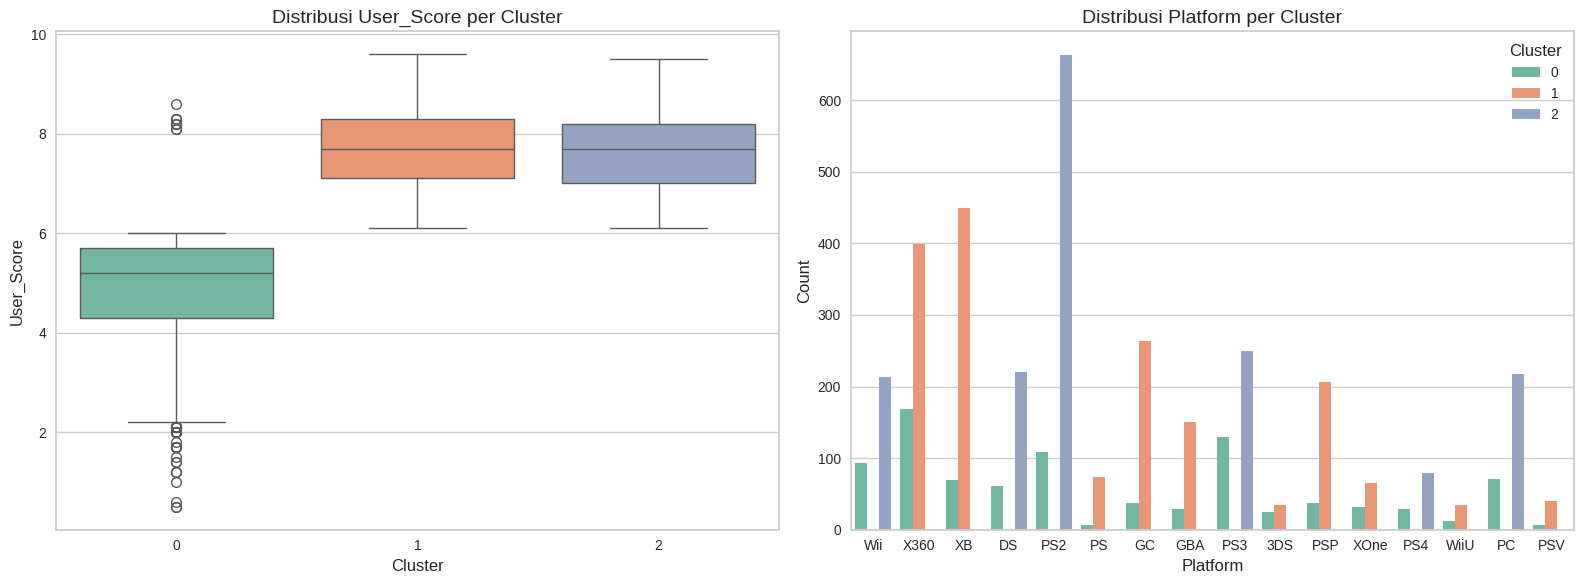

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

# Visualisasi distribusi User_Score per Cluster
sns.boxplot(data=data, x='cluster', y='User_Score', palette='Set2', ax=axes[0])
axes[0].set_title("Distribusi User_Score per Cluster", fontsize=14)
axes[0].set_xlabel("Cluster", fontsize=12)
axes[0].set_ylabel("User_Score", fontsize=12)

# Visualisasi distribusi Platform per Cluster
sns.countplot(data=data, x='Platform', hue='cluster', palette='Set2', ax=axes[1])
axes[1].set_title("Distribusi Platform per Cluster", fontsize=14)
axes[1].set_xlabel("Platform", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(title="Cluster")

plt.tight_layout()  # Menyesuaikan layout agar tidak bertabrakan
plt.show()

Insight:
1. User_Score
  - Cluster 0 (Hijau) memiliki median User_Score lebih rendah (~5), dengan banyak outlier di bawah 2.
  - Cluster 1 (Oranye) memiliki User_Score tertinggi, dengan median sekitar 8.
  - Cluster 2 (Biru) memiliki distribusi yang mirip dengan Cluster 1, tetapi dengan rentang yang lebih luas.

2. Platform
  - Cluster 2 (Biru) berisi banyak game dari platform populer seperti PS2 dan PS3.
  - Cluster 1 (Oranye) berisi banyak game dengan User_Score tinggi di platform seperti X360 dan DS.
  - Cluster 0 (Hijau) cenderung memiliki game dengan skor lebih rendah.

Kesimpulan:

- Cluster 0 berisi game dengan skor rendah dan lebih sedikit jumlah game di berbagai platform.
- Cluster 1 & 2 memiliki game dengan skor lebih tinggi, dengan Cluster 2 lebih banyak berasal dari PS2 dan PS3, sementara Cluster 1 lebih bervariasi (X360, DS, dll.).

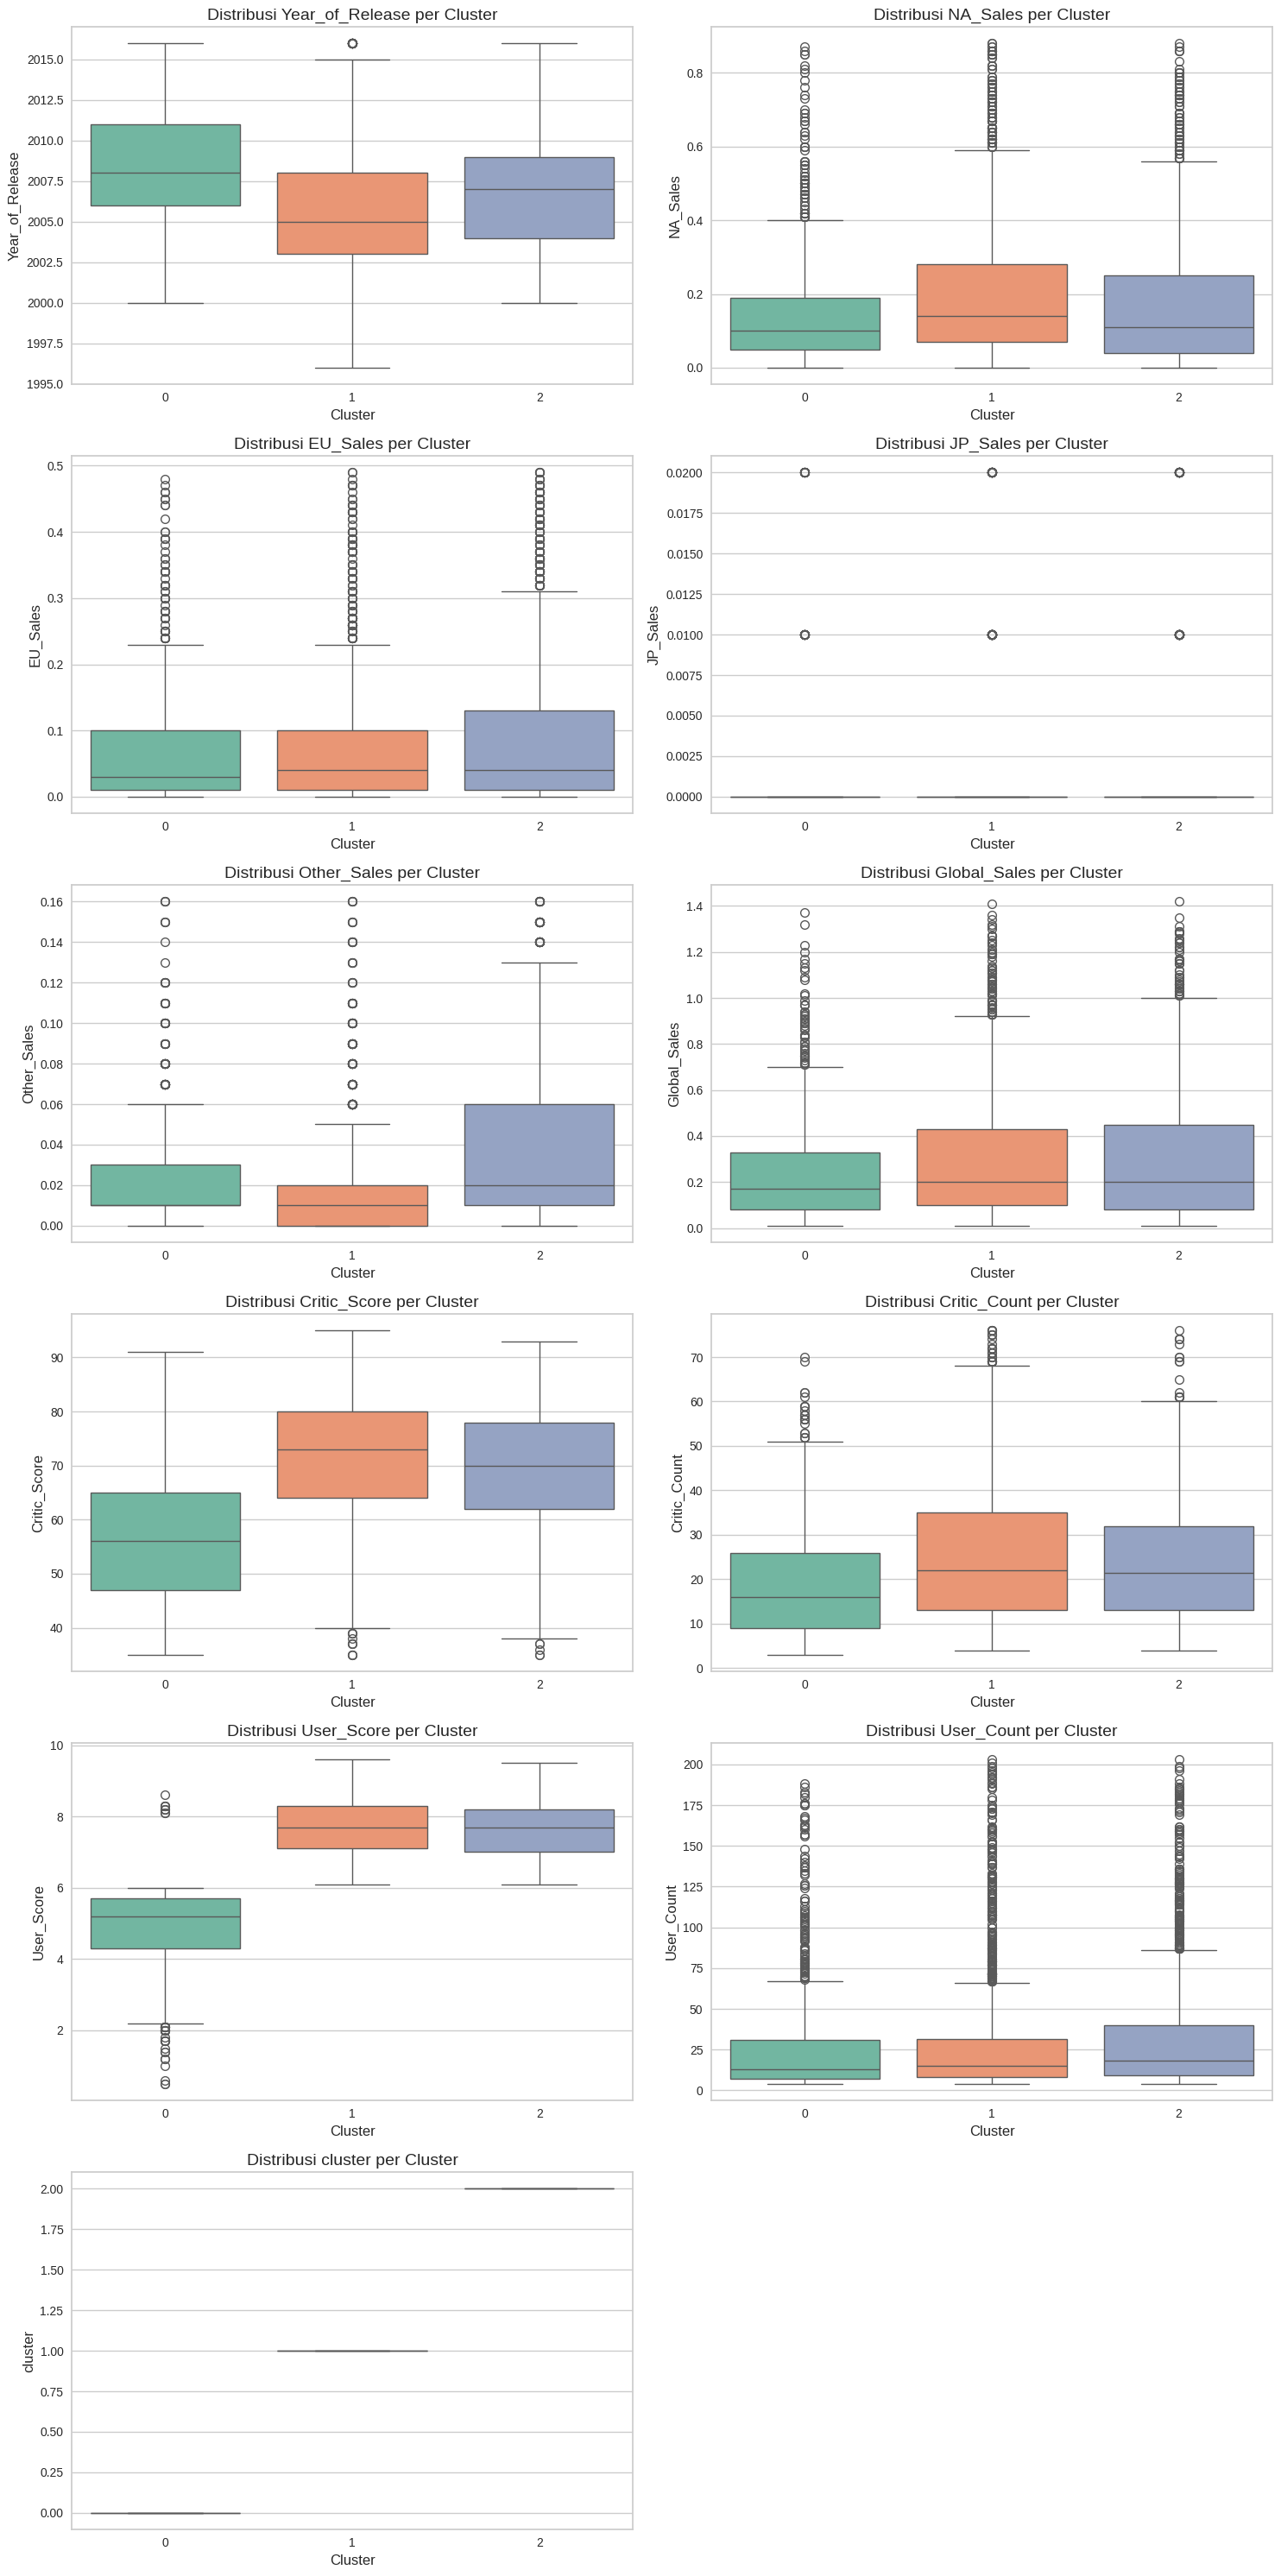

In [64]:
# Menentukan jumlah fitur numerik
num_features = len(numerical_columns)

# Menentukan ukuran grid subplot
cols = 2
rows = (num_features + 2) // cols  # Hitung jumlah baris yang dibutuhkan

# Membuat figure dan axes
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

# Flatten axes untuk mempermudah iterasi jika lebih dari 1 subplot
axes = axes.flatten()

# Looping melalui setiap fitur numerik dan membuat boxplot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x='cluster', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Distribusi {col} per Cluster", fontsize=14)
    axes[i].set_xlabel("Cluster", fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Hapus subplot kosong jika jumlah fitur tidak habis dibagi jumlah kolom
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

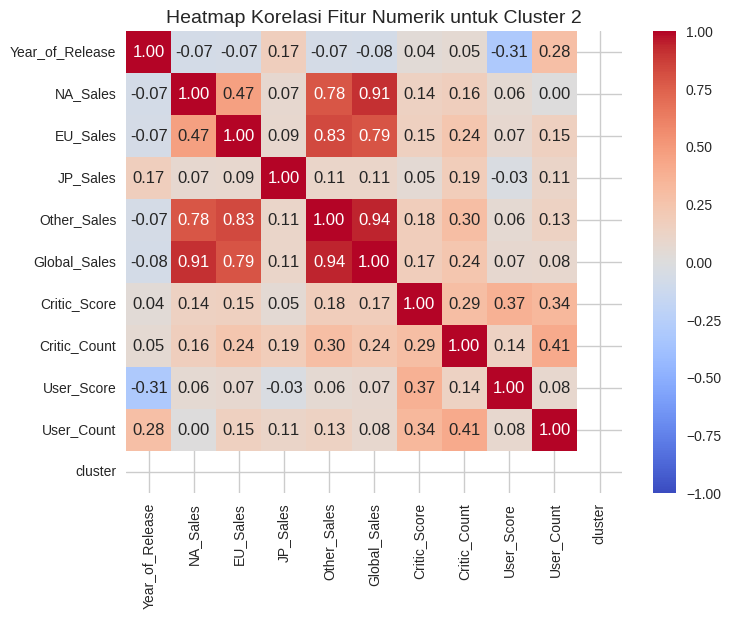

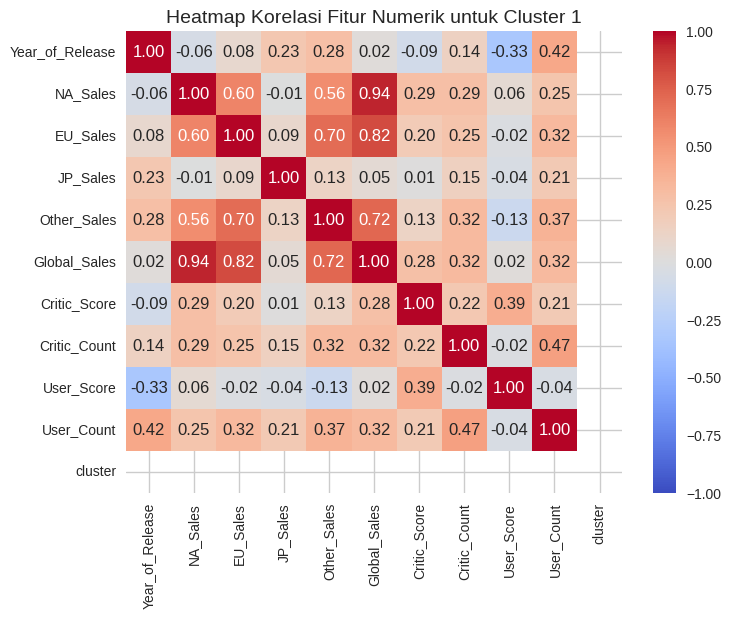

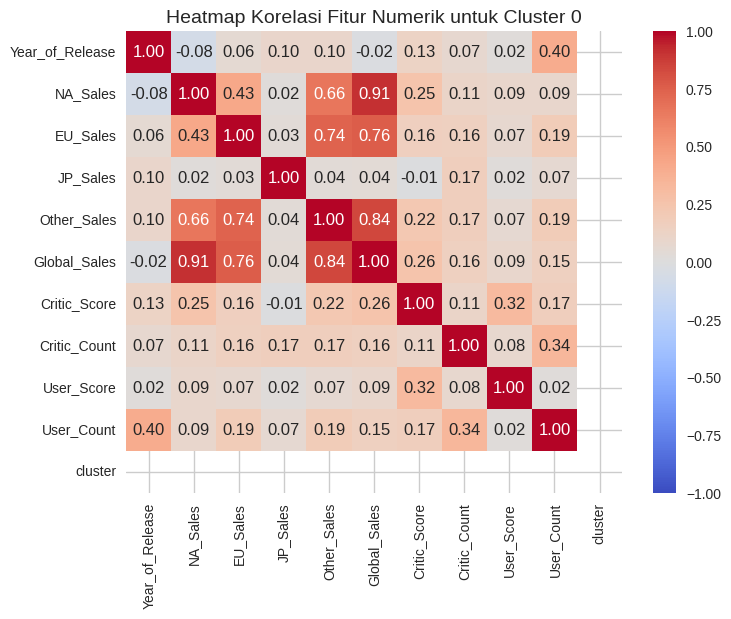

In [65]:
# Buat heatmap korelasi untuk setiap cluster
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster][numerical_columns]
    correlation_matrix = cluster_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f"Heatmap Korelasi Fitur Numerik untuk Cluster {cluster}", fontsize=14)
    plt.show()

Insight visualisasi Heatmap:
1. Heatmap Cluster 0:
  - NA_Sales vs Global_Sales (0.91) memiliki korelasi yang kuat, artinya Penjualan di Amerika Utara (NA_Sales) memiliki dampak besar terhadap total penjualan global (Global_Sales).
  - EU_Sales vs Global_Sales (0.76) miliki korelasi yg cukup tinggi, artinya penjualan di eropa memiliki dampak yang cukup signifikan terhadap penjualan global meskipun sedikit lebih rendah dari Amerika Utara..
  - Other_Sales vs Global_Sales (0.84) korelasinya sangat baik. negara luar juga memiliki pengaruh yang signifikan terhadap penjualan global
  - Year_of_Release vs Global_sales (-0.02) memiliki korelasi yang sangat rendah, artinya tahun rilis tidak terlalu berdampak pada penjualan global.

2. Heatmap Cluster 1:
  - NA_Sales vs Global_Sales (0.94) memiliki korelasi yang kuat, dibandingkan cluster 0
  - EU_Sales vs Global_Sales (0.82) miliki korelasi yg tinggi dibandingkan cluster 0.
  - Year_of_Release vs User_Score (-0.33) memiliki jumlah korelasi yang rendah.

3. Heatmap Cluster 2:
   - NA_Sales vs Global_Sales (0.91) memiliki korelasi yang kuat, artinya Penjualan di Amerika Utara (NA_Sales) memiliki dampak besar terhadap total penjualan global (Global_Sales).
  - EU_Sales vs Global_Sales (0.79) miliki korelasi yg cukup tinggi, artinya penjualan di eropa memiliki dampak yang cukup signifikan terhadap penjualan global meskipun sedikit lebih rendah dari Amerika Utara..
  - Other_Sales vs Global_Sales (0.94) korelasinya sangat baik. negara luar juga memiliki pengaruh yang signifikan terhadap penjualan global
  - Year_of_Release vs User_Score (-0.31) fitur ini memiliki korelasi yang sangat rendah.
  - User_Score vs Global_Sales (0.07) Korelasi sangat lemah, menegaskan bahwa ulasan pengguna tidak memiliki dampak besar terhadap penjualan game.


In [66]:
data.describe(include='all')

Name Platform  Year_of_Release  \
count                                        4273     4273      4273.000000   
unique                                       2863       16              NaN   
top     Harry Potter and the Order of the Phoenix      PS2              NaN   
freq                                            7      771              NaN   
mean                                          NaN      NaN      2006.823075   
std                                           NaN      NaN         3.859550   
min                                           NaN      NaN      1996.000000   
25%                                           NaN      NaN      2004.000000   
50%                                           NaN      NaN      2007.000000   
75%                                           NaN      NaN      2009.000000   
max                                           NaN      NaN      2016.000000   

         Genre        Publisher     NA_Sales    EU_Sales     JP_Sales  \
count     4273             4273  4273.000000  4273.00000  4273.000000   
unique      12              226          NaN         NaN          NaN   
top     Action  Electronic Arts          NaN         NaN          NaN   
freq      1013              610          NaN         NaN          NaN   
mean       NaN              NaN     0.179565     0.07952     0.001034   
std        NaN              NaN     0.179451     0.10038     0.003871   
min        NaN              NaN     0.000000     0.00000     0.000000   
25%        NaN              NaN     0.050000     0.01000     0.000000   
50%        NaN              NaN     0.120000     0.04000     0.000000   
75%        NaN              NaN     0.250000     0.11000     0.000000   
max        NaN              NaN     0.880000     0.49000     0.020000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count   4273.000000   4273.000000   4273.000000   4273.000000  4273.000000   
unique          NaN           NaN           NaN           NaN          NaN   
top             NaN           NaN           NaN           NaN          NaN   
freq            NaN           NaN           NaN           NaN          NaN   
mean       0.026747      0.287231     67.336532     23.539668     7.067868   
std        0.032084      0.271536     12.670098     14.715383     1.432622   
min        0.000000      0.010000     35.000000      3.000000     0.500000   
25%        0.010000      0.080000     59.000000     12.000000     6.300000   
50%        0.010000      0.190000     69.000000     20.000000     7.400000   
75%        0.040000      0.420000     77.000000     32.000000     8.100000   
max        0.160000      1.420000     95.000000     76.000000     9.600000   

         User_Count  Developer Rating      cluster  
count   4273.000000       4273   4273  4273.000000  
unique          NaN       1030      5          NaN  
top             NaN  EA Canada      T          NaN  
freq            NaN        110   1496          NaN  
mean      30.196115        NaN    NaN     1.169904  
std       36.342117        NaN    NaN     0.754923  
min        4.000000        NaN    NaN     0.000000  
25%        8.000000        NaN    NaN     1.000000  
50%       16.000000        NaN    NaN     1.000000  
75%       35.000000        NaN    NaN     2.000000  
max      203.000000        NaN    NaN     2.000000

In [67]:
data['cluster'].value_counts()

cluster
1    1715
2    1642
0     916
Name: count, dtype: int64

Tulis hasil interpretasinya di sini.
1. Cluster 0:
  - **Rata-rata Tahun Rilis**: 2008 (Rentang: 2000 - 2016)
  - **Rata-rata Penjualan (ribuan copy)**: NA Sales: 149, EU Sales: 68, JP Sales: 0.7, Other Sales: 23, Global Sales: 242
  - **Rata-rata Critic Score**: 56
  - **Rata-rata User Score**: 4.9
  - **Mayoritas Rating**: E (Everyone)
  - **Genre Dominan**: Action
  - **Platform Dominan**: X360
  - **Analisis**: Cluster ini berisi game dengan skor kritis dan ulasan pengguna rendah serta penjualan global yang kecil. Amerika Utara adalah pasar terbesar, namun penjualan di Jepang hampir tidak ada. Game di cluster ini cenderung dibuat untuk semua umur (Rating E) namun kualitasnya yang rendah mungkin membuatnya kurang menarik bagi banyak pembeli.

2. Cluster 1:
  - **Rata-rata Tahun Rilis**: 2006 (Rentang: 1996 - 2016)
  - **Rata-rata Penjualan (ribuan copy)**: NA Sales: 202, EU Sales: 75, JP Sales: 1, Other Sales: 19, Global Sales: 299
  - **Rata-rata Critic Score**: 71
  - **Rata-rata User Score**: 7.6
  - **Mayoritas Rating**: T (Teen)
  - **Genre Dominan**: Action
  - **Platform Dominan**: X360
  - **Analisis**: Cluster ini terdiri dari game dengan penjualan lebih tinggi dan kualitas yang lebih baik, terutama di Amerika Utara dan Eropa. Jepang masih memiliki kontribusi penjualan kecil. Game dalam cluster ini sangat populer di kalangan remaja, yang bisa dilihat dari mayoritas rating T (Teen).

3. Cluster 2:
  - **Rata-rata Tahun Rilis**: 2006 (Rentang: 1996 - 2016)
  - **Rata-rata Penjualan (ribuan copy)**: NA Sales: 172, EU Sales: 79, JP Sales: 1, Other Sales: 0, Global Sales: 299
  - **Rata-rata Critic Score**: 69
  - **Rata-rata User Score**: 7.6
  - **Mayoritas Rating**: T (Teen)
  - **Genre Dominan**: Action
  - **Platform Dominan**: PS2
  - **Analisis**: Cluster ini terdiri dari game dengan penjualan tertinggi dan kualitas sangat baik, terutama di pasar Amerika Utara dan Eropa. Platform PS2 mendominasi penjualan di cluster ini, menunjukkan kekuatan konsol tersebut dalam kesuksesan game.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [68]:
# Simpan hasil clustering ke csv file
data_cluster = X_model.copy()
data_cluster.to_csv('data_cluster.csv', index=False)
print("Data hasil clustering telah disimpan ke 'data_cluster.csv'.")

Data hasil clustering telah disimpan ke 'data_cluster.csv'.


In [69]:
cek_data_cluster = pd.read_csv('/content/data_cluster.csv')
cek_data_cluster.head(20)

global_sales_bin  critic_score_bin  critic_count_bin  user_score_bin  \
0                  0                 0                 1               1   
1                  0                 1                 2               1   
2                  0                 1                 1               0   
3                  0                 1                 2               1   
4                  0                 1                 1               1   
5                  0                 0                 0               2   
6                  0                 0                 1               0   
7                  0                 1                 1               2   
8                  0                 1                 1               2   
9                  0                 0                 0               2   
10                 0                 1                 1               2   
11                 0                 1                 2               1   
12                 0                 1                 1               2   
13                 0                 1                 1               2   
14                 0                 0                 2               1   
15                 0                 1                 2               1   
16                 0                 1                 1               2   
17                 0                 0                 1               1   
18                 0                 1                 2               2   
19                 0                 1                 2               2   

    user_count_bin  year_bin_1990s  year_bin_2000s  year_bin_2010s  \
0                1               0               1               0   
1                1               0               1               0   
2                2               0               1               0   
3                2               0               1               0   
4                1               0               1               0   
5                0               0               1               0   
6                1               0               0               1   
7                1               0               1               0   
8                1               0               1               0   
9                0               0               1               0   
10               1               0               0               1   
11               1               0               1               0   
12               2               0               1               0   
13               1               0               1               0   
14               2               0               1               0   
15               0               0               1               0   
16               1               0               0               1   
17               1               0               1               0   
18               2               0               0               1   
19               0               0               0               1   

    platform_bin_Other  platform_bin_PC  platform_bin_PlayStation  \
0                    0                0                         0   
1                    1                0                         0   
2                    0                0                         0   
3                    1                0                         0   
4                    0                0                         0   
5                    1                0                         0   
6                    1                0                         0   
7                    1                0                         0   
8                    0                0                         1   
9                    1                0                         0   
10                   1                0                         0   
11                   0                0                         1   
12                   0                0